## 1) Familarizing with the data

In [9]:
import os #File and Directory Operations:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

data_directory = os.getcwd() # Directory where your data files are stored

data_frames = [] # Initialize an empty DataFrame to store the combined data
number = 10
count = 0

for filename in os.listdir(data_directory):
    count = count +1
    if filename.endswith(".txt"):  
        filepath = os.path.join(data_directory, filename) #The line of code filepath = os.path.join(data_directory, filename) is used to create a full file path by joining together two parts: data_directory and filename
        
        
        df = pd.read_csv(filepath, delimiter=',', header=None, # header = 0  indicates firls line of text file has columnn names but since we dont have it we will put None
                         names=['date_time', 'open', 'high', 'low', 'close', 'volume'])
        
        
        df['ticker'] = os.path.splitext(filename)[0]

        
        df['Timestamp'] = pd.to_datetime(df['date_time'])
        
        
        df.set_index(['Timestamp', 'ticker'], inplace=True)
        
        
        df.drop(['date_time'], axis=1, inplace=True)
       
        
        data_frames.append(df)
    if count == number:
        break

combined_data = pd.concat(data_frames)
combined_data.sort_index(inplace=True)

# You now have all the intraday stock data for S&P 500 stocks in the 'combined_data' DataFrame.
# You can perform various analyses or use this data as needed.

In [10]:
print(combined_data.head(20))
print(combined_data['close'].dtype)

                                 open    high     low   close  volume
Timestamp           ticker                                           
2005-01-03 08:00:00 AAPL_1min  0.9939  0.9944  0.9939  0.9944   39200
2005-01-03 08:02:00 AAPL_1min  0.9863  0.9863  0.9863  0.9863  304360
2005-01-03 08:03:00 AAPL_1min  0.9955  0.9956  0.9955  0.9956   16800
2005-01-03 08:04:00 AAPL_1min  0.9962  0.9985  0.9962  0.9985  161504
2005-01-03 08:07:00 AAPL_1min  0.9971  0.9971  0.9970  0.9970   50400
2005-01-03 08:08:00 AAPL_1min  0.9962  0.9970  0.9962  0.9970   16800
2005-01-03 08:09:00 AAPL_1min  0.9962  0.9970  0.9962  0.9970  117600
2005-01-03 08:10:00 AAPL_1min  0.9962  0.9962  0.9962  0.9962   28000
2005-01-03 08:13:00 AAPL_1min  0.9955  0.9955  0.9955  0.9955   16800
2005-01-03 08:14:00 AAPL_1min  0.9955  0.9962  0.9955  0.9955   78400
2005-01-03 08:15:00 AAPL_1min  0.9955  0.9955  0.9955  0.9955   56000
2005-01-03 08:17:00 AAPL_1min  0.9955  0.9955  0.9955  0.9955  190400
2005-01-03 08:19:00 

In [11]:

combined_data.index.get_level_values('ticker').unique()

Index(['AAPL_1min', 'ABMD_1min', 'ABT_1min', 'ABC_1min', 'AAP_1min',
       'ACN_1min', 'ABBV_1min', 'AAL_1min', 'AA_1min'],
      dtype='object', name='ticker')

In [12]:
# List of stock symbols  to plot
symbols_to_plot = ['AAPL_1min', 'ABMD_1min', 'ABT_1min', 'ABC_1min', 'AAP_1min',
       'ACN_1min']

### a) - plotting minute-by-minute

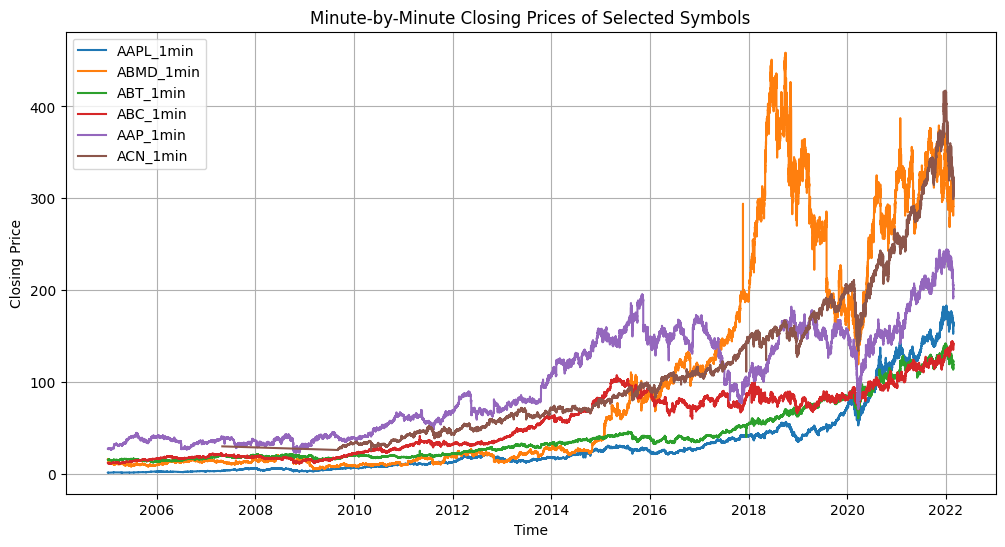

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for symbol in symbols_to_plot:
    symbol_data = combined_data.loc[combined_data.index.get_level_values('ticker') == symbol]
    plt.plot(symbol_data.index.get_level_values('Timestamp'), symbol_data['close'], label=symbol)

plt.title('Minute-by-Minute Closing Prices of Selected Symbols')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

plt.show()


In the code daily_data = combined_data['close'].resample('D').last(), 'D' is a string that represents the resampling frequency. In this case, 'D' stands for "daily."

When you resample time-series data, you can specify different frequencies to aggregate or transform the data based on your needs. Here are some common frequency strings used in Pandas:

'D': Daily frequency, which aggregates the data to a daily interval. In this case, .last() is used to take the last value of each day's data, typically the closing price.

'W': Weekly frequency, which aggregates the data to a weekly interval.

'M': Monthly frequency, which aggregates the data to a monthly interval.

'Q': Quarterly frequency, which aggregates the data to a quarterly interval.

'A': Annual frequency, which aggregates the data to an annual interval.

##### About the function :
Here's a breakdown of what .resample('D').last() does:

.resample('D'): This method resamples the time-series data, in this case, to a daily ('D') frequency. It groups the data into daily intervals.

.last(): Within each daily interval created by the resampling, this function selects the last data point (the last row) as the representative value for that day. It assumes that the data points within each daily interval are sorted in chronological order, with the last data point representing the closing value for that day.

For example, if you have intraday data with timestamps for each minute and you use .resample('D').last(), it will give you a DataFrame where each row represents a day, and the values for 'open', 'high', 'low', 'close', and 'volume' are taken from the last minute of that day.

This method is commonly used in financial time series analysis to create daily candlestick charts, where the last data point of the day represents the closing price, and the 'high' and 'low' values for the day are the highest and lowest prices reached during the day.

##### other methods
 Assuming 'df' is your DataFrame and 'date_time' is your timestamp column\
daily_data = df.resample('D').agg({\
    'open': 'first',\
    'high': 'max',\
    'low': 'min',\
    'close': 'last',\
    'volume': 'sum'\
})



### b) - plotting Day-by-Day

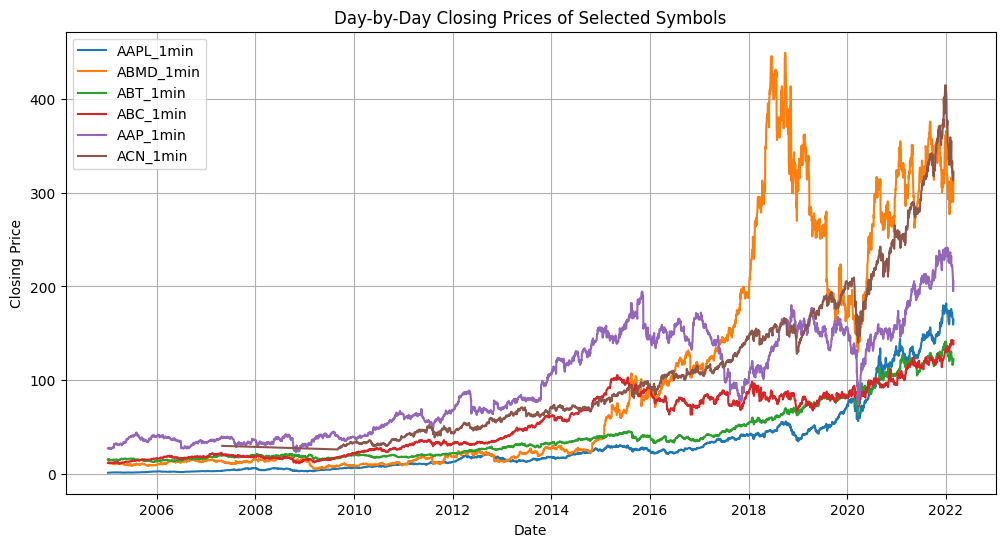

In [14]:
# Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'MultiIndex'

# Reset the index to make it a single-level index
combined_data_reset = combined_data.reset_index()

# Resampling data to daily frequency and calculate the daily closing price
daily_data = combined_data_reset.groupby(['ticker', pd.Grouper(key='Timestamp', freq='D')])['close'].last() # pd.grouper is op 

plt.figure(figsize=(12, 6))

for symbol in symbols_to_plot:
    symbol_data = daily_data.loc[symbol]
    plt.plot(symbol_data.index, symbol_data, label=symbol)

plt.title('Day-by-Day Closing Prices of Selected Symbols')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)

plt.show()



### c)- Candle stick plot
To create a candlestick chart from your combined multi-index DataFrame (combined_data), you can follow these steps:

Prepare the Data for Plotting: You'll need to resample the data to the desired time frame (e.g., daily) since candlestick charts are typically used to represent daily price movements. You can also choose a specific stock ticker to plot.

Plot the Candlestick Chart: Use a plotting library like mplfinance or plotly to create the candlestick chart.

In [15]:
def generate_daily_candlesticks(data, tickers, start_date,end_date):
    daily_candlesticks = {}  # Create a dictionary to store data for each ticker
    
    for ticker in tickers:
        # Filter data for the current ticker
        ticker_data = data.xs(key=ticker, level='ticker')
        ticker_data = ticker_data.loc[start_date:end_date]
        
        # Resample to daily frequency
        daily_data = ticker_data.resample('D').agg({
            'open': 'first',
            'high': 'max',
            'low': 'min',
            'close': 'last',
            'volume': 'sum'
        })
        
        # Store the daily data for the current ticker in the dictionary
        daily_candlesticks[ticker] = daily_data
    
    return daily_candlesticks

In [16]:
# Specify the time period you want to plot
start_date = '2021-10-02'
end_date = '2022-01-06'
daily_candlestick = generate_daily_candlesticks(combined_data, symbols_to_plot,start_date,end_date)

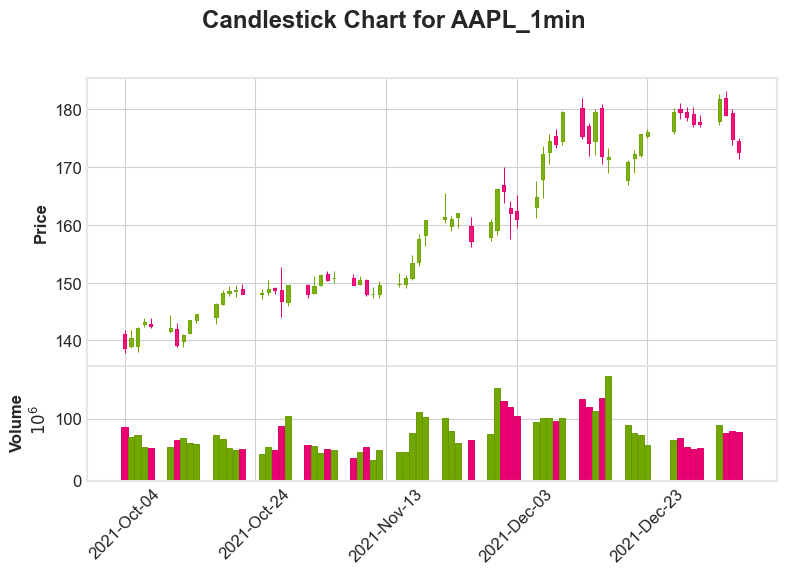

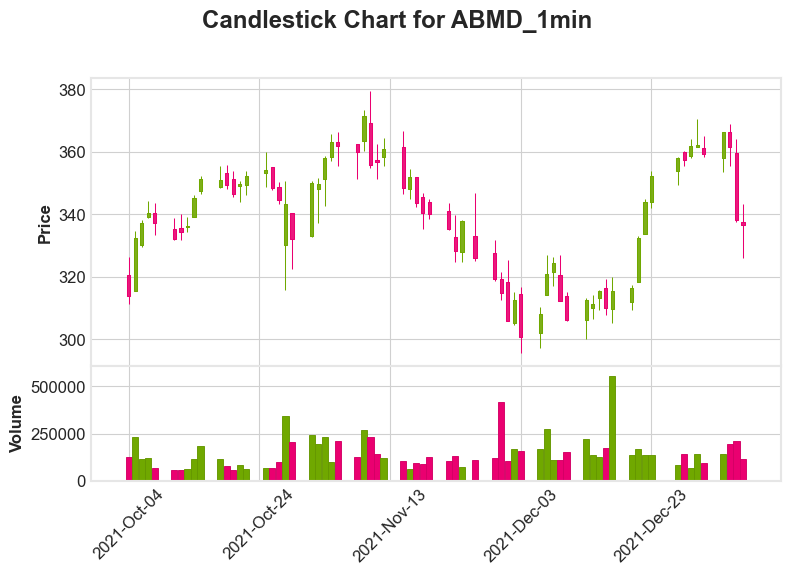

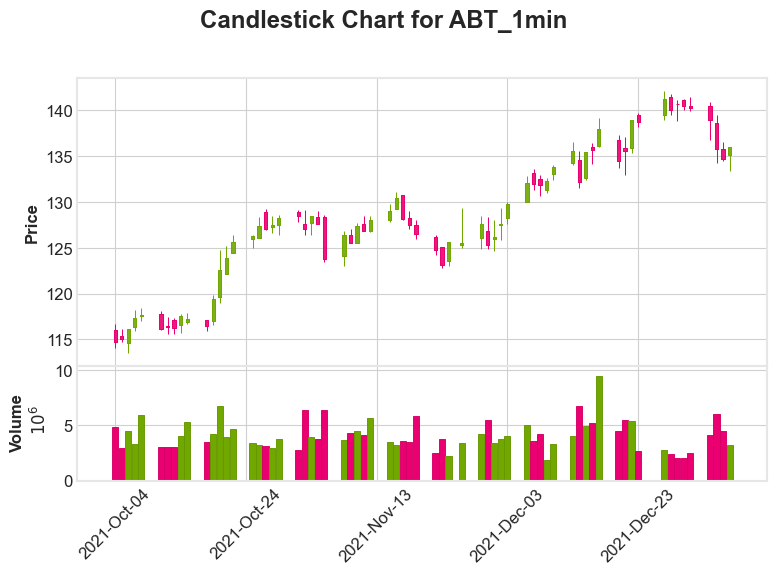

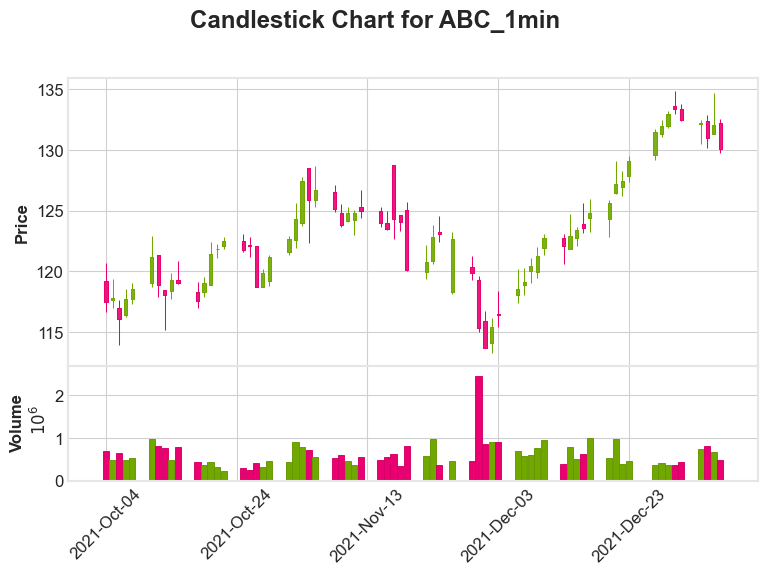

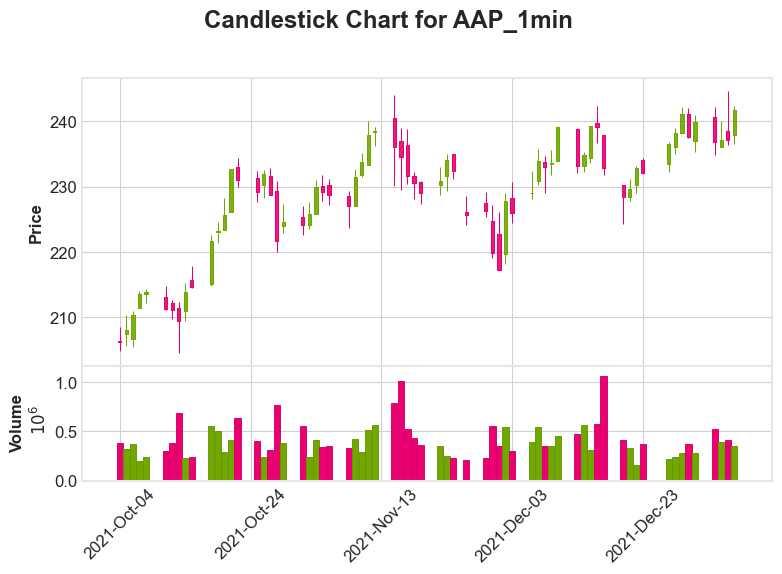

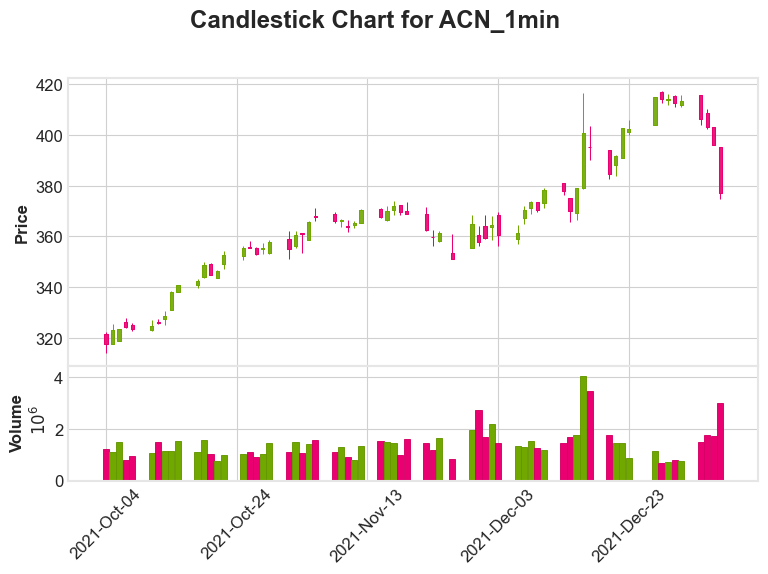

In [18]:
import mplfinance as mpf
style = mpf.make_mpf_style(base_mpf_style='binance', gridstyle='-')

# Plot the candlestick chart with volume on a secondary Y-axis
for ticker in daily_candlestick:
    mpf.plot(daily_candlestick[ticker], type='candle', style=style, title=f'Candlestick Chart for {ticker}',
         ylabel='Price', volume=True, ylabel_lower='Volume', figratio=(10, 6))


### d)- Looking at the data one can see that there are issues like :
        * presence of data outside of trading hours
        * missing days (most likely Saturdays & Sundays) when market is closed 

# Q2: Normalization 
Here, Normalization is important because , prices of various stocks changes overtime which can bring high volatality, and extreme values can distort analysis. Normalization can help stabilize the data and reduce the impact of outliers.

**Min-Max Scaling:**

Use Case: Min-Max scaling is useful when you want to maintain the relative differences between data points and constrain them to a specific range (e.g., [0, 1]).\
When to Use: It's often used when you need to compare data points in terms of their proportions or when you're working with models that require input data to be within a certain range.\

**Z-Score Normalization (Standardization):**

Use Case: Z-score normalization is suitable when you want to compare data points in terms of their distance from the mean and are not concerned about preserving the original range.\
When to Use: It's useful for identifying outliers and comparing data points in terms of standard deviations from the mean.\


##### I have used Min-Max scaling as it scales the data to a specific range, typically between 0 and 1. This preserves the interpretability of the scaled data. Since the data doesnot conatain any outliers we can use MinMax scaler. Standard Scaler scales the data between [-1,1]. Standadscaler is more like find the deviation from the mean meanwhile MinMax scaling is more of scaling the data.

In [19]:
print(combined_data)

                                   open      high       low     close  volume
Timestamp           ticker                                                   
2005-01-03 08:00:00 AAPL_1min    0.9939    0.9944    0.9939    0.9944   39200
2005-01-03 08:02:00 AAPL_1min    0.9863    0.9863    0.9863    0.9863  304360
2005-01-03 08:03:00 AAPL_1min    0.9955    0.9956    0.9955    0.9956   16800
2005-01-03 08:04:00 AAPL_1min    0.9962    0.9985    0.9962    0.9985  161504
2005-01-03 08:07:00 AAPL_1min    0.9971    0.9971    0.9970    0.9970   50400
...                                 ...       ...       ...       ...     ...
2022-02-25 19:58:00 AAL_1min    17.4800   17.4900   17.4799   17.4900   10517
                    AAPL_1min  164.3400  164.3400  164.3300  164.3300     557
2022-02-25 19:59:00 AAL_1min    17.4800   17.4900   17.4800   17.4900   13317
                    AAPL_1min  164.3400  164.3500  164.3400  164.3400    2390
                    AA_1min     77.9000   77.9000   77.7900   77

we have to normalize each stock individually 

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Specify the stock ticker you want to scale
target_ticker = 'AAPL_1min'
columns_to_normalize = ['open', 'high', 'low', 'close', 'volume']

filter_data = combined_data.loc[pd.IndexSlice[:, target_ticker], columns_to_normalize]
print(filter_data)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(filter_data)

normalized_combined_data = combined_data.copy()
normalized_combined_data.loc[pd.IndexSlice[:, target_ticker], columns_to_normalize] = normalized_data



                                   open      high       low     close  volume
Timestamp           ticker                                                   
2005-01-03 08:00:00 AAPL_1min    0.9939    0.9944    0.9939    0.9944   39200
2005-01-03 08:02:00 AAPL_1min    0.9863    0.9863    0.9863    0.9863  304360
2005-01-03 08:03:00 AAPL_1min    0.9955    0.9956    0.9955    0.9956   16800
2005-01-03 08:04:00 AAPL_1min    0.9962    0.9985    0.9962    0.9985  161504
2005-01-03 08:07:00 AAPL_1min    0.9971    0.9971    0.9970    0.9970   50400
...                                 ...       ...       ...       ...     ...
2022-02-25 19:54:00 AAPL_1min  164.3100  164.3100  164.3100  164.3100     350
2022-02-25 19:55:00 AAPL_1min  164.3200  164.3200  164.3200  164.3200     100
2022-02-25 19:57:00 AAPL_1min  164.3800  164.3800  164.3800  164.3800     422
2022-02-25 19:58:00 AAPL_1min  164.3400  164.3400  164.3300  164.3300     557
2022-02-25 19:59:00 AAPL_1min  164.3400  164.3500  164.3400  164

In [21]:
print(normalized_combined_data.loc[pd.IndexSlice[:, target_ticker], columns_to_normalize])

                                   open      high       low     close  \
Timestamp           ticker                                              
2005-01-03 08:00:00 AAPL_1min  0.000199  0.000195  0.002624  0.000201   
2005-01-03 08:02:00 AAPL_1min  0.000157  0.000151  0.002583  0.000157   
2005-01-03 08:03:00 AAPL_1min  0.000207  0.000202  0.002633  0.000208   
2005-01-03 08:04:00 AAPL_1min  0.000211  0.000218  0.002637  0.000224   
2005-01-03 08:07:00 AAPL_1min  0.000216  0.000210  0.002641  0.000216   
...                                 ...       ...       ...       ...   
2022-02-25 19:54:00 AAPL_1min  0.896609  0.896608  0.896958  0.896707   
2022-02-25 19:55:00 AAPL_1min  0.896664  0.896663  0.897013  0.896762   
2022-02-25 19:57:00 AAPL_1min  0.896993  0.896993  0.897341  0.897092   
2022-02-25 19:58:00 AAPL_1min  0.896774  0.896773  0.897068  0.896817   
2022-02-25 19:59:00 AAPL_1min  0.896774  0.896828  0.897122  0.896872   

                                 volume  
Timestam

In [ ]:
print(normalized_combined_data.shape)

In [22]:
from sklearn.preprocessing import StandardScaler

# Specify the stock ticker you want to scale
target_ticker = 'AAPL_1min'
columns_to_normalize = ['open', 'high', 'low', 'close', 'volume']

filtered_data = combined_data.loc[pd.IndexSlice[:, target_ticker], columns_to_normalize]
scaler = StandardScaler()
normalized_data = scaler.fit_transform(filtered_data)

normalized_combined_data1 = combined_data.copy()
normalized_combined_data1.loc[pd.IndexSlice[:, target_ticker], columns_to_normalize] = normalized_data



In [ ]:
print(normalized_combined_data1)

# Data preprocessing
 * Remove all data which are out of trading hours(discard all data before 9:30 and after 15:59)
 
 

In [23]:
start_time = pd.Timestamp("09:30:00")
end_time = pd.Timestamp("16:00:00")  # 4:00 PM

#a custom filtering function
def filter_trading_hours(group):
    trading_hours_mask = ((group.index.get_level_values('Timestamp').time >= start_time.time()) & 
                         (group.index.get_level_values('Timestamp').time <= end_time.time()))
    return group[trading_hours_mask]


filtered_data = normalized_combined_data.groupby('ticker',as_index=False).apply(filter_trading_hours) # this is a pandas series

# The 'filtered_data' DataFrame will now contain data only within the specified trading hours on each trading day for each ticker.


In [ ]:
print(type(filtered_data))

In [24]:
print(filtered_data)

                                    open      high       low     close  \
  Timestamp           ticker                                             
0 2013-12-09 09:30:00 AAL_1min   22.5315   22.8143   22.4372   22.6541   
  2013-12-09 09:31:00 AAL_1min   22.6446   22.8143   22.6352   22.6729   
  2013-12-09 09:32:00 AAL_1min   22.6729   22.7861   22.6635   22.7248   
  2013-12-09 09:33:00 AAL_1min   22.7653   22.7672   22.7012   22.7248   
  2013-12-09 09:34:00 AAL_1min   22.7295   22.8049   22.6918   22.7861   
...                                  ...       ...       ...       ...   
8 2022-02-25 15:56:00 ACN_1min  322.3000  322.4900  322.1400  322.2850   
  2022-02-25 15:57:00 ACN_1min  322.3200  322.3200  321.9300  322.0900   
  2022-02-25 15:58:00 ACN_1min  322.0900  322.3200  321.9800  322.3200   
  2022-02-25 15:59:00 ACN_1min  322.2200  322.5700  322.1850  322.5600   
  2022-02-25 16:00:00 ACN_1min  322.5100  322.5100  322.5100  322.5100   

                                  vol

In [25]:
aapl_data = filtered_data.xs(target_ticker, level='ticker')
print(aapl_data)

                           open      high       low     close    volume
  Timestamp                                                            
1 2005-01-03 09:30:00  0.000181  0.000192  0.002606  0.000197  0.084400
  2005-01-03 09:31:00  0.000197  0.000202  0.002620  0.000197  0.021187
  2005-01-03 09:32:00  0.000195  0.000194  0.002608  0.000184  0.013934
  2005-01-03 09:33:00  0.000184  0.000199  0.002605  0.000183  0.014106
  2005-01-03 09:34:00  0.000183  0.000199  0.002589  0.000165  0.027101
...                         ...       ...       ...       ...       ...
  2022-02-25 15:56:00  0.899689  0.899902  0.899422  0.899534  0.001282
  2022-02-25 15:57:00  0.899518  0.899517  0.898820  0.899287  0.001660
  2022-02-25 15:58:00  0.899244  0.899627  0.899368  0.899562  0.002196
  2022-02-25 15:59:00  0.899463  0.899902  0.898491  0.899782  0.004649
  2022-02-25 16:00:00  0.899573  0.899682  0.899094  0.899672  0.023630

[1683881 rows x 5 columns]


## 3.
1. I would opt for high-frequency trading, which means making a lot of quick trades in a very short time, here minutes. For frequent, high-volume traders, a slightly wider spread with lower commission fees may be more cost-effective.</br>

2. To keep my high-frequency trading costs low, I'm concentrating on two things: buy-ask spreads and trading commissions.
I'm picking assets that are easy to buy and sell and setting lower commission rates.</br>

3. In high-frequency trading, I'd choose to trade one stock. Focusing on a single stock allows us to specialize and become an expert in the behavior of that particular asset. Then the knowledge of this stock can be applied to other stocks in same industry.

## 4) LSTM to predict minute by minute closing price 

In [26]:
#hyperparameters
input_size = 5  # Number of input features
hidden_size = 64  # Number of LSTM units
num_layers = 2  # Number of LSTM layers
output_size = 1  # Number of output units (predicting next minute's closing price)
sequence_length = 20  # Length of input sequences

In [27]:
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=hidden_size, num_layers=num_layers, output_size=1, dropout=0.0):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.linear_1 = nn.Linear(input_size, hidden_layer_size)
        # self.relu = nn.ReLU()
        self.lstm = nn.LSTM(hidden_layer_size, hidden_size=self.hidden_layer_size, num_layers=num_layers, batch_first=True)
        self.dropout = nn.Dropout(dropout)
        self.linear_2 = nn.Linear(num_layers*hidden_layer_size, output_size)
        

    def forward(self, x):
        batchsize = x.shape[0]

        # layer 1
        x = self.linear_1(x)
       
        # LSTM layer
        lstm_out, (h_n, c_n) = self.lstm(x)

        # reshape output from hidden cell into [batch, features] for `linear_2`
        x = h_n.permute(1, 0, 2).reshape(batchsize, -1) 
        
        # layer 2
        x = self.dropout(x)
        predictions = self.linear_2(x)
        return predictions[:,-1]

## 5) -Flexible Datloader


In [28]:
import pandas as pd
# Specify the desired ticker and date
selected_ticker = target_ticker # to change this make change in minmax scaler part 
start_day = pd.to_datetime('2021-01-04')  # problem : i have to look if the date is present in the data
end_day = pd.to_datetime('2021-06-23')   
ticker_data  = filtered_data[(filtered_data.index.get_level_values('Timestamp').date >= start_day.date()) & 
                             (filtered_data.index.get_level_values('Timestamp').date <= end_day.date()) & 
                             (filtered_data.index.get_level_values('ticker') == selected_ticker)]

In [29]:
print(ticker_data)

                                     open      high       low     close  \
  Timestamp           ticker                                              
1 2021-01-04 09:30:00 AAPL_1min  0.722192  0.722691  0.719846  0.720255   
  2021-01-04 09:31:00 AAPL_1min  0.720067  0.721809  0.720553  0.721263   
  2021-01-04 09:32:00 AAPL_1min  0.721238  0.721318  0.720064  0.720037   
  2021-01-04 09:33:00 AAPL_1min  0.719958  0.720174  0.718542  0.718054   
  2021-01-04 09:34:00 AAPL_1min  0.718051  0.718431  0.716802  0.718402   
...                                   ...       ...       ...       ...   
  2021-06-23 15:56:00 AAPL_1min  0.725281  0.725498  0.726027  0.725525   
  2021-06-23 15:57:00 AAPL_1min  0.725446  0.725771  0.726191  0.725552   
  2021-06-23 15:58:00 AAPL_1min  0.725472  0.725662  0.726191  0.725634   
  2021-06-23 15:59:00 AAPL_1min  0.725582  0.725717  0.725973  0.725525   
  2021-06-23 16:00:00 AAPL_1min  0.725500  0.725717  0.726245  0.725634   

                        

### making a dataframe with target close price 

In [30]:
import pandas as pd
ticker_data_copy = ticker_data.copy()
ticker_data_copy['target_close'] = ticker_data_copy['close'].shift(-1)# the shifting is done to make the next minute closing price as the taget price for the previous minute
ticker_data_copy = ticker_data_copy.dropna()

# Define input features and target variable
input_features = ['open', 'high', 'low', 'close', 'volume']
target_variable = 'target_close'

# Split the data into input (X) and target (y) arrays
X = ticker_data_copy[input_features].values
y = ticker_data_copy[target_variable].values


In [31]:
print(ticker_data_copy)

                                     open      high       low     close  \
  Timestamp           ticker                                              
1 2021-01-04 09:30:00 AAPL_1min  0.722192  0.722691  0.719846  0.720255   
  2021-01-04 09:31:00 AAPL_1min  0.720067  0.721809  0.720553  0.721263   
  2021-01-04 09:32:00 AAPL_1min  0.721238  0.721318  0.720064  0.720037   
  2021-01-04 09:33:00 AAPL_1min  0.719958  0.720174  0.718542  0.718054   
  2021-01-04 09:34:00 AAPL_1min  0.718051  0.718431  0.716802  0.718402   
...                                   ...       ...       ...       ...   
  2021-06-23 15:55:00 AAPL_1min  0.724909  0.725334  0.725646  0.725361   
  2021-06-23 15:56:00 AAPL_1min  0.725281  0.725498  0.726027  0.725525   
  2021-06-23 15:57:00 AAPL_1min  0.725446  0.725771  0.726191  0.725552   
  2021-06-23 15:58:00 AAPL_1min  0.725472  0.725662  0.726191  0.725634   
  2021-06-23 15:59:00 AAPL_1min  0.725582  0.725717  0.725973  0.725525   

                        

In [ ]:
print(type(X))
print(X.shape)

#### Defined a class to make tensors of required sequence length 

In [32]:
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

# Define a custom dataset
class StockDataset(Dataset):
    def __init__(self, X, y, sequence_length):
        self.X = X
        self.y = y
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.X) - self.sequence_length

    def __getitem__(self, indx):
        # Get a sequence of data with the specified length
        X_seq = self.X[indx:indx + self.sequence_length]
        y_target = self.y[indx + self.sequence_length - 1]  # The target is the last value in the sequence
        return torch.tensor(X_seq, dtype=torch.float32), torch.tensor(y_target, dtype=torch.float32)


## 6)- Training the Model

In [33]:

# Create datasets and dataloaders for training and testing
train_ratio = 0.74885  # Adjust this ratio based on your train/test split
train_size = int(train_ratio * len(X))
print(train_size+1)

train_dataset = StockDataset(X[:train_size+1], y[:train_size+1], sequence_length)
test_dataset = StockDataset(X[train_size+1:], y[train_size+1:], sequence_length)

batch_size = 32# Adjust as needed
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False,drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size,drop_last=True)


device = "cuda" if torch.cuda.is_available() else "cpu"

34843


In [34]:
# Iterate through the DataLoader and print the contents of each batch
for batch_idx, (x, y) in enumerate(train_dataloader):
    print(f"Batch {batch_idx + 1} - x:")
    print(x)
    print(f"Batch {batch_idx + 1} - y:")
    print(y)


Batch 1 - x:
tensor([[[0.7222, 0.7227, 0.7198, 0.7203, 0.0102],
         [0.7201, 0.7218, 0.7206, 0.7213, 0.0021],
         [0.7212, 0.7213, 0.7201, 0.7200, 0.0021],
         ...,
         [0.7136, 0.7146, 0.7139, 0.7140, 0.0013],
         [0.7138, 0.7147, 0.7146, 0.7140, 0.0011],
         [0.7139, 0.7155, 0.7145, 0.7154, 0.0013]],

        [[0.7201, 0.7218, 0.7206, 0.7213, 0.0021],
         [0.7212, 0.7213, 0.7201, 0.7200, 0.0021],
         [0.7200, 0.7202, 0.7185, 0.7181, 0.0021],
         ...,
         [0.7138, 0.7147, 0.7146, 0.7140, 0.0011],
         [0.7139, 0.7155, 0.7145, 0.7154, 0.0013],
         [0.7152, 0.7152, 0.7139, 0.7138, 0.0016]],

        [[0.7212, 0.7213, 0.7201, 0.7200, 0.0021],
         [0.7200, 0.7202, 0.7185, 0.7181, 0.0021],
         [0.7181, 0.7184, 0.7168, 0.7184, 0.0028],
         ...,
         [0.7139, 0.7155, 0.7145, 0.7154, 0.0013],
         [0.7152, 0.7152, 0.7139, 0.7138, 0.0016],
         [0.7136, 0.7139, 0.7133, 0.7133, 0.0014]],

        ...,

       

tensor([[[7.0364e-01, 7.0367e-01, 7.0359e-01, 7.0295e-01, 9.3565e-04],
         [7.0299e-01, 7.0399e-01, 7.0354e-01, 7.0376e-01, 7.4288e-04],
         [7.0372e-01, 7.0465e-01, 7.0445e-01, 7.0445e-01, 8.6039e-04],
         ...,
         [7.0361e-01, 7.0448e-01, 7.0403e-01, 7.0445e-01, 1.0556e-03],
         [7.0443e-01, 7.0443e-01, 7.0482e-01, 7.0421e-01, 7.7184e-04],
         [7.0416e-01, 7.0427e-01, 7.0457e-01, 7.0388e-01, 4.8155e-04]],

        [[7.0299e-01, 7.0399e-01, 7.0354e-01, 7.0376e-01, 7.4288e-04],
         [7.0372e-01, 7.0465e-01, 7.0445e-01, 7.0445e-01, 8.6039e-04],
         [7.0432e-01, 7.0448e-01, 7.0446e-01, 7.0391e-01, 5.1084e-04],
         ...,
         [7.0443e-01, 7.0443e-01, 7.0482e-01, 7.0421e-01, 7.7184e-04],
         [7.0416e-01, 7.0427e-01, 7.0457e-01, 7.0388e-01, 4.8155e-04],
         [7.0378e-01, 7.0421e-01, 7.0452e-01, 7.0394e-01, 4.8686e-04]],

        [[7.0372e-01, 7.0465e-01, 7.0445e-01, 7.0445e-01, 8.6039e-04],
         [7.0432e-01, 7.0448e-01, 7.0446e-01,

Batch 38 - x:
tensor([[[0.6938, 0.6954, 0.6940, 0.6954, 0.0026],
         [0.6953, 0.6953, 0.6952, 0.6950, 0.0017],
         [0.6950, 0.6952, 0.6944, 0.6944, 0.0020],
         ...,
         [0.6981, 0.6982, 0.6982, 0.6978, 0.0015],
         [0.6976, 0.6978, 0.6974, 0.6977, 0.0019],
         [0.6977, 0.6989, 0.6977, 0.6988, 0.0019]],

        [[0.6953, 0.6953, 0.6952, 0.6950, 0.0017],
         [0.6950, 0.6952, 0.6944, 0.6944, 0.0020],
         [0.6944, 0.6948, 0.6947, 0.6946, 0.0013],
         ...,
         [0.6976, 0.6978, 0.6974, 0.6977, 0.0019],
         [0.6977, 0.6989, 0.6977, 0.6988, 0.0019],
         [0.6988, 0.7002, 0.6992, 0.7001, 0.0025]],

        [[0.6950, 0.6952, 0.6944, 0.6944, 0.0020],
         [0.6944, 0.6948, 0.6947, 0.6946, 0.0013],
         [0.6946, 0.6949, 0.6948, 0.6942, 0.0014],
         ...,
         [0.6977, 0.6989, 0.6977, 0.6988, 0.0019],
         [0.6988, 0.7002, 0.6992, 0.7001, 0.0025],
         [0.7000, 0.7001, 0.6997, 0.6992, 0.0015]],

        ...,

      

tensor([0.7118, 0.7121, 0.7121, 0.7120, 0.7127, 0.7124, 0.7125, 0.7125, 0.7119,
        0.7111, 0.7114, 0.7116, 0.7116, 0.7123, 0.7128, 0.7128, 0.7124, 0.7125,
        0.7126, 0.7131, 0.7133, 0.7136, 0.7136, 0.7139, 0.7136, 0.7137, 0.7137,
        0.7134, 0.7137, 0.7136, 0.7142, 0.7144])
Batch 61 - x:
tensor([[[7.1157e-01, 7.1192e-01, 7.1229e-01, 7.1165e-01, 3.8389e-04],
         [7.1157e-01, 7.1238e-01, 7.1226e-01, 7.1232e-01, 7.0089e-04],
         [7.1228e-01, 7.1282e-01, 7.1305e-01, 7.1284e-01, 6.5080e-04],
         ...,
         [7.1358e-01, 7.1369e-01, 7.1408e-01, 7.1355e-01, 6.4599e-04],
         [7.1347e-01, 7.1424e-01, 7.1425e-01, 7.1421e-01, 1.9075e-03],
         [7.1418e-01, 7.1440e-01, 7.1463e-01, 7.1437e-01, 1.1960e-03]],

        [[7.1157e-01, 7.1238e-01, 7.1226e-01, 7.1232e-01, 7.0089e-04],
         [7.1228e-01, 7.1282e-01, 7.1305e-01, 7.1284e-01, 6.5080e-04],
         [7.1271e-01, 7.1309e-01, 7.1333e-01, 7.1276e-01, 7.6623e-04],
         ...,
         [7.1347e-01, 7.1424

Batch 78 - x:
tensor([[[6.9622e-01, 6.9658e-01, 6.9703e-01, 6.9653e-01, 4.8389e-04],
         [6.9642e-01, 6.9647e-01, 6.9653e-01, 6.9608e-01, 7.1853e-04],
         [6.9599e-01, 6.9604e-01, 6.9598e-01, 6.9535e-01, 9.1488e-04],
         ...,
         [6.9490e-01, 6.9489e-01, 6.9515e-01, 6.9448e-01, 6.1637e-04],
         [6.9446e-01, 6.9468e-01, 6.9517e-01, 6.9448e-01, 4.4260e-04],
         [6.9441e-01, 6.9446e-01, 6.9465e-01, 6.9396e-01, 8.4720e-04]],

        [[6.9642e-01, 6.9647e-01, 6.9653e-01, 6.9608e-01, 7.1853e-04],
         [6.9599e-01, 6.9604e-01, 6.9598e-01, 6.9535e-01, 9.1488e-04],
         [6.9530e-01, 6.9560e-01, 6.9582e-01, 6.9568e-01, 7.6552e-04],
         ...,
         [6.9446e-01, 6.9468e-01, 6.9517e-01, 6.9448e-01, 4.4260e-04],
         [6.9441e-01, 6.9446e-01, 6.9465e-01, 6.9396e-01, 8.4720e-04],
         [6.9381e-01, 6.9397e-01, 6.9436e-01, 6.9374e-01, 7.8878e-04]],

        [[6.9599e-01, 6.9604e-01, 6.9598e-01, 6.9535e-01, 9.1488e-04],
         [6.9530e-01, 6.9560e-0

tensor([[[0.7043, 0.7045, 0.7041, 0.7042, 0.0015],
         [0.7042, 0.7046, 0.7038, 0.7044, 0.0016],
         [0.7043, 0.7056, 0.7046, 0.7051, 0.0017],
         ...,
         [0.7026, 0.7037, 0.7027, 0.7035, 0.0015],
         [0.7033, 0.7037, 0.7037, 0.7038, 0.0011],
         [0.7037, 0.7037, 0.7035, 0.7035, 0.0010]],

        [[0.7042, 0.7046, 0.7038, 0.7044, 0.0016],
         [0.7043, 0.7056, 0.7046, 0.7051, 0.0017],
         [0.7049, 0.7054, 0.7047, 0.7054, 0.0016],
         ...,
         [0.7033, 0.7037, 0.7037, 0.7038, 0.0011],
         [0.7037, 0.7037, 0.7035, 0.7035, 0.0010],
         [0.7034, 0.7042, 0.7038, 0.7041, 0.0015]],

        [[0.7043, 0.7056, 0.7046, 0.7051, 0.0017],
         [0.7049, 0.7054, 0.7047, 0.7054, 0.0016],
         [0.7054, 0.7055, 0.7046, 0.7040, 0.0011],
         ...,
         [0.7037, 0.7037, 0.7035, 0.7035, 0.0010],
         [0.7034, 0.7042, 0.7038, 0.7041, 0.0015],
         [0.7040, 0.7041, 0.7037, 0.7031, 0.0012]],

        ...,

        [[0.7023, 0.

Batch 119 - x:
tensor([[[6.9599e-01, 6.9609e-01, 6.9666e-01, 6.9612e-01, 1.8224e-04],
         [6.9601e-01, 6.9617e-01, 6.9653e-01, 6.9588e-01, 3.4419e-04],
         [6.9582e-01, 6.9593e-01, 6.9604e-01, 6.9535e-01, 3.8978e-04],
         ...,
         [6.9577e-01, 6.9609e-01, 6.9636e-01, 6.9563e-01, 3.4958e-04],
         [6.9560e-01, 6.9598e-01, 6.9615e-01, 6.9551e-01, 4.5735e-04],
         [6.9539e-01, 6.9554e-01, 6.9577e-01, 6.9531e-01, 4.9809e-04]],

        [[6.9601e-01, 6.9617e-01, 6.9653e-01, 6.9588e-01, 3.4419e-04],
         [6.9582e-01, 6.9593e-01, 6.9604e-01, 6.9535e-01, 3.8978e-04],
         [6.9533e-01, 6.9538e-01, 6.9560e-01, 6.9538e-01, 5.0938e-04],
         ...,
         [6.9560e-01, 6.9598e-01, 6.9615e-01, 6.9551e-01, 4.5735e-04],
         [6.9539e-01, 6.9554e-01, 6.9577e-01, 6.9531e-01, 4.9809e-04],
         [6.9525e-01, 6.9538e-01, 6.9593e-01, 6.9535e-01, 2.4803e-04]],

        [[6.9582e-01, 6.9593e-01, 6.9604e-01, 6.9535e-01, 3.8978e-04],
         [6.9533e-01, 6.9538e-

tensor([[[6.9032e-01, 6.9070e-01, 6.9098e-01, 6.9069e-01, 1.1093e-03],
         [6.9062e-01, 6.9070e-01, 6.9109e-01, 6.9040e-01, 7.0424e-04],
         [6.9037e-01, 6.9092e-01, 6.9109e-01, 6.9088e-01, 1.1947e-03],
         ...,
         [6.9773e-01, 6.9953e-01, 6.9839e-01, 6.9949e-01, 1.9331e-03],
         [6.9931e-01, 7.0127e-01, 7.0001e-01, 7.0064e-01, 2.7243e-03],
         [7.0051e-01, 7.0176e-01, 7.0098e-01, 7.0118e-01, 1.8734e-03]],

        [[6.9062e-01, 6.9070e-01, 6.9109e-01, 6.9040e-01, 7.0424e-04],
         [6.9037e-01, 6.9092e-01, 6.9109e-01, 6.9088e-01, 1.1947e-03],
         [6.9076e-01, 6.9113e-01, 6.9134e-01, 6.9061e-01, 8.1095e-04],
         ...,
         [6.9931e-01, 7.0127e-01, 7.0001e-01, 7.0064e-01, 2.7243e-03],
         [7.0051e-01, 7.0176e-01, 7.0098e-01, 7.0118e-01, 1.8734e-03],
         [7.0105e-01, 7.0203e-01, 7.0180e-01, 7.0206e-01, 1.9901e-03]],

        [[6.9037e-01, 6.9092e-01, 6.9109e-01, 6.9088e-01, 1.1947e-03],
         [6.9076e-01, 6.9113e-01, 6.9134e-01,

tensor([0.7347, 0.7347, 0.7343, 0.7341, 0.7340, 0.7339, 0.7347, 0.7353, 0.7358,
        0.7364, 0.7362, 0.7358, 0.7365, 0.7364, 0.7367, 0.7362, 0.7365, 0.7363,
        0.7363, 0.7363, 0.7362, 0.7362, 0.7362, 0.7362, 0.7358, 0.7356, 0.7355,
        0.7357, 0.7353, 0.7352, 0.7346, 0.7345])
Batch 152 - x:
tensor([[[7.3570e-01, 7.3649e-01, 7.3632e-01, 7.3645e-01, 7.7192e-04],
         [7.3636e-01, 7.3668e-01, 7.3686e-01, 7.3641e-01, 8.0719e-04],
         [7.3630e-01, 7.3660e-01, 7.3681e-01, 7.3666e-01, 5.2293e-04],
         ...,
         [7.3517e-01, 7.3542e-01, 7.3577e-01, 7.3517e-01, 5.0562e-04],
         [7.3510e-01, 7.3537e-01, 7.3523e-01, 7.3464e-01, 5.7664e-04],
         [7.3450e-01, 7.3461e-01, 7.3501e-01, 7.3451e-01, 6.0878e-04]],

        [[7.3636e-01, 7.3668e-01, 7.3686e-01, 7.3641e-01, 8.0719e-04],
         [7.3630e-01, 7.3660e-01, 7.3681e-01, 7.3666e-01, 5.2293e-04],
         [7.3658e-01, 7.3667e-01, 7.3686e-01, 7.3622e-01, 4.4454e-04],
         ...,
         [7.3510e-01, 7.353

Batch 168 - x:
tensor([[[7.4774e-01, 7.4796e-01, 7.4784e-01, 7.4744e-01, 7.6726e-04],
         [7.4736e-01, 7.4747e-01, 7.4773e-01, 7.4728e-01, 4.5515e-04],
         [7.4717e-01, 7.4742e-01, 7.4779e-01, 7.4725e-01, 3.3833e-04],
         ...,
         [7.4674e-01, 7.4720e-01, 7.4740e-01, 7.4723e-01, 5.3549e-04],
         [7.4714e-01, 7.4807e-01, 7.4779e-01, 7.4810e-01, 9.1069e-04],
         [7.4802e-01, 7.4851e-01, 7.4871e-01, 7.4848e-01, 1.4476e-03]],

        [[7.4736e-01, 7.4747e-01, 7.4773e-01, 7.4728e-01, 4.5515e-04],
         [7.4717e-01, 7.4742e-01, 7.4779e-01, 7.4725e-01, 3.3833e-04],
         [7.4717e-01, 7.4731e-01, 7.4779e-01, 7.4723e-01, 2.7334e-04],
         ...,
         [7.4714e-01, 7.4807e-01, 7.4779e-01, 7.4810e-01, 9.1069e-04],
         [7.4802e-01, 7.4851e-01, 7.4871e-01, 7.4848e-01, 1.4476e-03],
         [7.4840e-01, 7.4851e-01, 7.4875e-01, 7.4821e-01, 7.8660e-04]],

        [[7.4717e-01, 7.4742e-01, 7.4779e-01, 7.4725e-01, 3.3833e-04],
         [7.4717e-01, 7.4731e-

tensor([[[7.7057e-01, 7.7057e-01, 7.7067e-01, 7.7027e-01, 5.6882e-04],
         [7.7019e-01, 7.7057e-01, 7.7061e-01, 7.7027e-01, 6.7015e-04],
         [7.7014e-01, 7.7013e-01, 7.6969e-01, 7.6946e-01, 8.6358e-04],
         ...,
         [7.6929e-01, 7.6975e-01, 7.6985e-01, 7.6957e-01, 8.4414e-04],
         [7.6954e-01, 7.6975e-01, 7.6964e-01, 7.6962e-01, 6.5046e-04],
         [7.6954e-01, 7.6997e-01, 7.7007e-01, 7.6995e-01, 8.4830e-04]],

        [[7.7019e-01, 7.7057e-01, 7.7061e-01, 7.7027e-01, 6.7015e-04],
         [7.7014e-01, 7.7013e-01, 7.6969e-01, 7.6946e-01, 8.6358e-04],
         [7.6932e-01, 7.6975e-01, 7.6996e-01, 7.6976e-01, 6.4589e-04],
         ...,
         [7.6954e-01, 7.6975e-01, 7.6964e-01, 7.6962e-01, 6.5046e-04],
         [7.6954e-01, 7.6997e-01, 7.7007e-01, 7.6995e-01, 8.4830e-04],
         [7.6986e-01, 7.7030e-01, 7.6996e-01, 7.6953e-01, 1.0761e-03]],

        [[7.7014e-01, 7.7013e-01, 7.6969e-01, 7.6946e-01, 8.6358e-04],
         [7.6932e-01, 7.6975e-01, 7.6996e-01,

tensor([0.7747, 0.7749, 0.7746, 0.7753, 0.7755, 0.7762, 0.7760, 0.7759, 0.7763,
        0.7769, 0.7773, 0.7769, 0.7751, 0.7765, 0.7760, 0.7769, 0.7767, 0.7772,
        0.7767, 0.7762, 0.7756, 0.7757, 0.7752, 0.7755, 0.7753, 0.7748, 0.7752,
        0.7742, 0.7743, 0.7739, 0.7736, 0.7745])
Batch 199 - x:
tensor([[[7.7678e-01, 7.7704e-01, 7.7556e-01, 7.7505e-01, 1.1120e-03],
         [7.7496e-01, 7.7662e-01, 7.7559e-01, 7.7655e-01, 9.4520e-04],
         [7.7662e-01, 7.7700e-01, 7.7649e-01, 7.7600e-01, 8.2681e-04],
         ...,
         [7.7411e-01, 7.7417e-01, 7.7420e-01, 7.7387e-01, 1.1839e-03],
         [7.7379e-01, 7.7395e-01, 7.7385e-01, 7.7356e-01, 9.0561e-04],
         [7.7351e-01, 7.7449e-01, 7.7393e-01, 7.7447e-01, 5.8234e-04]],

        [[7.7496e-01, 7.7662e-01, 7.7559e-01, 7.7655e-01, 9.4520e-04],
         [7.7662e-01, 7.7700e-01, 7.7649e-01, 7.7600e-01, 8.2681e-04],
         [7.7592e-01, 7.7705e-01, 7.7649e-01, 7.7687e-01, 6.9089e-04],
         ...,
         [7.7379e-01, 7.739

tensor([[[7.6241e-01, 7.6567e-01, 7.6306e-01, 7.6515e-01, 2.6361e-03],
         [7.6506e-01, 7.6768e-01, 7.6572e-01, 7.6767e-01, 2.5550e-03],
         [7.6758e-01, 7.6767e-01, 7.6670e-01, 7.6695e-01, 1.6110e-03],
         ...,
         [7.6387e-01, 7.6468e-01, 7.6447e-01, 7.6455e-01, 8.3867e-04],
         [7.6436e-01, 7.6474e-01, 7.6398e-01, 7.6483e-01, 9.4089e-04],
         [7.6474e-01, 7.6539e-01, 7.6436e-01, 7.6417e-01, 7.4979e-04]],

        [[7.6506e-01, 7.6768e-01, 7.6572e-01, 7.6767e-01, 2.5550e-03],
         [7.6758e-01, 7.6767e-01, 7.6670e-01, 7.6695e-01, 1.6110e-03],
         [7.6681e-01, 7.6790e-01, 7.6621e-01, 7.6570e-01, 2.1957e-03],
         ...,
         [7.6436e-01, 7.6474e-01, 7.6398e-01, 7.6483e-01, 9.4089e-04],
         [7.6474e-01, 7.6539e-01, 7.6436e-01, 7.6417e-01, 7.4979e-04],
         [7.6414e-01, 7.6496e-01, 7.6284e-01, 7.6319e-01, 1.7433e-03]],

        [[7.6758e-01, 7.6767e-01, 7.6670e-01, 7.6695e-01, 1.6110e-03],
         [7.6681e-01, 7.6790e-01, 7.6621e-01,

tensor([0.7079, 0.7095, 0.7093, 0.7106, 0.7110, 0.7111, 0.7106, 0.7103, 0.7089,
        0.7084, 0.7092, 0.7066, 0.7079, 0.7069, 0.7065, 0.7065, 0.7079, 0.7086,
        0.7088, 0.7096, 0.7097, 0.7104, 0.7110, 0.7118, 0.7126, 0.7142, 0.7128,
        0.7139, 0.7134, 0.7125, 0.7131, 0.7143])
Batch 228 - x:
tensor([[[0.7066, 0.7081, 0.7072, 0.7079, 0.0010],
         [0.7076, 0.7081, 0.7069, 0.7069, 0.0012],
         [0.7069, 0.7077, 0.7070, 0.7065, 0.0010],
         ...,
         [0.7133, 0.7136, 0.7129, 0.7125, 0.0018],
         [0.7124, 0.7132, 0.7126, 0.7131, 0.0011],
         [0.7130, 0.7143, 0.7134, 0.7143, 0.0012]],

        [[0.7076, 0.7081, 0.7069, 0.7069, 0.0012],
         [0.7069, 0.7077, 0.7070, 0.7065, 0.0010],
         [0.7064, 0.7068, 0.7069, 0.7065, 0.0008],
         ...,
         [0.7124, 0.7132, 0.7126, 0.7131, 0.0011],
         [0.7130, 0.7143, 0.7134, 0.7143, 0.0012],
         [0.7143, 0.7160, 0.7151, 0.7156, 0.0016]],

        [[0.7069, 0.7077, 0.7070, 0.7065, 0.0010],
 

tensor([[[7.2688e-01, 7.2720e-01, 7.2724e-01, 7.2685e-01, 6.0197e-04],
         [7.2674e-01, 7.2759e-01, 7.2746e-01, 7.2767e-01, 5.2961e-04],
         [7.2763e-01, 7.2768e-01, 7.2789e-01, 7.2730e-01, 4.7786e-04],
         ...,
         [7.2682e-01, 7.2688e-01, 7.2708e-01, 7.2685e-01, 4.3748e-04],
         [7.2688e-01, 7.2747e-01, 7.2735e-01, 7.2739e-01, 5.2977e-04],
         [7.2729e-01, 7.2764e-01, 7.2767e-01, 7.2767e-01, 4.7577e-04]],

        [[7.2674e-01, 7.2759e-01, 7.2746e-01, 7.2767e-01, 5.2961e-04],
         [7.2763e-01, 7.2768e-01, 7.2789e-01, 7.2730e-01, 4.7786e-04],
         [7.2722e-01, 7.2726e-01, 7.2718e-01, 7.2685e-01, 4.8010e-04],
         ...,
         [7.2688e-01, 7.2747e-01, 7.2735e-01, 7.2739e-01, 5.2977e-04],
         [7.2729e-01, 7.2764e-01, 7.2767e-01, 7.2767e-01, 4.7577e-04],
         [7.2746e-01, 7.2758e-01, 7.2751e-01, 7.2712e-01, 4.7650e-04]],

        [[7.2763e-01, 7.2768e-01, 7.2789e-01, 7.2730e-01, 4.7786e-04],
         [7.2722e-01, 7.2726e-01, 7.2718e-01,

tensor([[[7.3080e-01, 7.3080e-01, 7.3099e-01, 7.3047e-01, 5.4105e-04],
         [7.3039e-01, 7.3042e-01, 7.3066e-01, 7.3001e-01, 6.9138e-04],
         [7.2998e-01, 7.3014e-01, 7.3045e-01, 7.2979e-01, 5.4404e-04],
         ...,
         [7.2998e-01, 7.3129e-01, 7.3017e-01, 7.3023e-01, 6.9934e-03],
         [7.3015e-01, 7.3020e-01, 7.2979e-01, 7.2984e-01, 2.2939e-02],
         [7.3309e-01, 7.3445e-01, 7.3170e-01, 7.3140e-01, 6.7916e-03]],

        [[7.3039e-01, 7.3042e-01, 7.3066e-01, 7.3001e-01, 6.9138e-04],
         [7.2998e-01, 7.3014e-01, 7.3045e-01, 7.2979e-01, 5.4404e-04],
         [7.2971e-01, 7.3085e-01, 7.3045e-01, 7.3066e-01, 1.2135e-03],
         ...,
         [7.3015e-01, 7.3020e-01, 7.2979e-01, 7.2984e-01, 2.2939e-02],
         [7.3309e-01, 7.3445e-01, 7.3170e-01, 7.3140e-01, 6.7916e-03],
         [7.3124e-01, 7.3123e-01, 7.3023e-01, 7.2963e-01, 2.4035e-03]],

        [[7.2998e-01, 7.3014e-01, 7.3045e-01, 7.2979e-01, 5.4404e-04],
         [7.2971e-01, 7.3085e-01, 7.3045e-01,

tensor([[[7.3543e-01, 7.3548e-01, 7.3594e-01, 7.3535e-01, 2.6102e-04],
         [7.3532e-01, 7.3614e-01, 7.3594e-01, 7.3617e-01, 5.1226e-04],
         [7.3608e-01, 7.3625e-01, 7.3659e-01, 7.3622e-01, 4.8412e-04],
         ...,
         [7.3664e-01, 7.3668e-01, 7.3710e-01, 7.3647e-01, 2.7918e-04],
         [7.3636e-01, 7.3638e-01, 7.3691e-01, 7.3638e-01, 2.7500e-04],
         [7.3630e-01, 7.3674e-01, 7.3702e-01, 7.3682e-01, 4.0675e-04]],

        [[7.3532e-01, 7.3614e-01, 7.3594e-01, 7.3617e-01, 5.1226e-04],
         [7.3608e-01, 7.3625e-01, 7.3659e-01, 7.3622e-01, 4.8412e-04],
         [7.3618e-01, 7.3619e-01, 7.3659e-01, 7.3617e-01, 2.5492e-04],
         ...,
         [7.3636e-01, 7.3638e-01, 7.3691e-01, 7.3638e-01, 2.7500e-04],
         [7.3630e-01, 7.3674e-01, 7.3702e-01, 7.3682e-01, 4.0675e-04],
         [7.3673e-01, 7.3685e-01, 7.3729e-01, 7.3671e-01, 5.7593e-04]],

        [[7.3608e-01, 7.3625e-01, 7.3659e-01, 7.3622e-01, 4.8412e-04],
         [7.3618e-01, 7.3619e-01, 7.3659e-01,

tensor([[[7.3370e-01, 7.3430e-01, 7.3415e-01, 7.3424e-01, 1.1975e-03],
         [7.3414e-01, 7.3457e-01, 7.3464e-01, 7.3438e-01, 8.8758e-04],
         [7.3432e-01, 7.3506e-01, 7.3470e-01, 7.3504e-01, 8.7962e-04],
         ...,
         [7.3744e-01, 7.3785e-01, 7.3726e-01, 7.3689e-01, 7.5798e-04],
         [7.3681e-01, 7.3741e-01, 7.3737e-01, 7.3719e-01, 6.8901e-04],
         [7.3709e-01, 7.3713e-01, 7.3693e-01, 7.3643e-01, 8.9066e-04]],

        [[7.3414e-01, 7.3457e-01, 7.3464e-01, 7.3438e-01, 8.8758e-04],
         [7.3432e-01, 7.3506e-01, 7.3470e-01, 7.3504e-01, 8.7962e-04],
         [7.3496e-01, 7.3523e-01, 7.3519e-01, 7.3490e-01, 8.3537e-04],
         ...,
         [7.3681e-01, 7.3741e-01, 7.3737e-01, 7.3719e-01, 6.8901e-04],
         [7.3709e-01, 7.3713e-01, 7.3693e-01, 7.3643e-01, 8.9066e-04],
         [7.3642e-01, 7.3681e-01, 7.3693e-01, 7.3666e-01, 7.2019e-04]],

        [[7.3432e-01, 7.3506e-01, 7.3470e-01, 7.3504e-01, 8.7962e-04],
         [7.3496e-01, 7.3523e-01, 7.3519e-01,

Batch 309 - x:
tensor([[[7.4554e-01, 7.4565e-01, 7.4499e-01, 7.4461e-01, 9.7448e-04],
         [7.4453e-01, 7.4456e-01, 7.4472e-01, 7.4420e-01, 7.0931e-04],
         [7.4415e-01, 7.4423e-01, 7.4444e-01, 7.4412e-01, 6.1875e-04],
         ...,
         [7.4254e-01, 7.4254e-01, 7.4276e-01, 7.4216e-01, 5.3797e-04],
         [7.4208e-01, 7.4243e-01, 7.4270e-01, 7.4208e-01, 6.3019e-04],
         [7.4199e-01, 7.4205e-01, 7.4183e-01, 7.4142e-01, 1.2880e-03]],

        [[7.4453e-01, 7.4456e-01, 7.4472e-01, 7.4420e-01, 7.0931e-04],
         [7.4415e-01, 7.4423e-01, 7.4444e-01, 7.4412e-01, 6.1875e-04],
         [7.4404e-01, 7.4472e-01, 7.4472e-01, 7.4469e-01, 7.4809e-04],
         ...,
         [7.4208e-01, 7.4243e-01, 7.4270e-01, 7.4208e-01, 6.3019e-04],
         [7.4199e-01, 7.4205e-01, 7.4183e-01, 7.4142e-01, 1.2880e-03],
         [7.4128e-01, 7.4156e-01, 7.4172e-01, 7.4131e-01, 7.5827e-04]],

        [[7.4415e-01, 7.4423e-01, 7.4444e-01, 7.4412e-01, 6.1875e-04],
         [7.4404e-01, 7.4472e-

tensor([[[7.3326e-01, 7.3370e-01, 7.3372e-01, 7.3356e-01, 4.2274e-04],
         [7.3348e-01, 7.3408e-01, 7.3404e-01, 7.3410e-01, 3.6806e-04],
         [7.3397e-01, 7.3452e-01, 7.3432e-01, 7.3367e-01, 6.3831e-04],
         ...,
         [7.3326e-01, 7.3348e-01, 7.3312e-01, 7.3288e-01, 6.5160e-04],
         [7.3283e-01, 7.3359e-01, 7.3312e-01, 7.3269e-01, 5.9964e-04],
         [7.3266e-01, 7.3299e-01, 7.3339e-01, 7.3307e-01, 2.5702e-04]],

        [[7.3348e-01, 7.3408e-01, 7.3404e-01, 7.3410e-01, 3.6806e-04],
         [7.3397e-01, 7.3452e-01, 7.3432e-01, 7.3367e-01, 6.3831e-04],
         [7.3359e-01, 7.3412e-01, 7.3426e-01, 7.3394e-01, 3.3014e-04],
         ...,
         [7.3283e-01, 7.3359e-01, 7.3312e-01, 7.3269e-01, 5.9964e-04],
         [7.3266e-01, 7.3299e-01, 7.3339e-01, 7.3307e-01, 2.5702e-04],
         [7.3302e-01, 7.3302e-01, 7.3320e-01, 7.3302e-01, 2.7520e-04]],

        [[7.3397e-01, 7.3452e-01, 7.3432e-01, 7.3367e-01, 6.3831e-04],
         [7.3359e-01, 7.3412e-01, 7.3426e-01,

tensor([0.7258, 0.7255, 0.7256, 0.7255, 0.7253, 0.7255, 0.7258, 0.7257, 0.7258,
        0.7260, 0.7265, 0.7268, 0.7262, 0.7252, 0.7255, 0.7256, 0.7257, 0.7257,
        0.7256, 0.7260, 0.7262, 0.7265, 0.7265, 0.7266, 0.7268, 0.7267, 0.7262,
        0.7264, 0.7263, 0.7266, 0.7267, 0.7272])
Batch 340 - x:
tensor([[[7.2666e-01, 7.2666e-01, 7.2675e-01, 7.2617e-01, 4.9643e-04],
         [7.2606e-01, 7.2606e-01, 7.2539e-01, 7.2516e-01, 1.3613e-03],
         [7.2513e-01, 7.2562e-01, 7.2572e-01, 7.2554e-01, 4.5569e-04],
         ...,
         [7.2628e-01, 7.2669e-01, 7.2702e-01, 7.2663e-01, 2.3165e-04],
         [7.2658e-01, 7.2682e-01, 7.2719e-01, 7.2668e-01, 7.1263e-04],
         [7.2660e-01, 7.2715e-01, 7.2691e-01, 7.2723e-01, 3.5710e-04]],

        [[7.2606e-01, 7.2606e-01, 7.2539e-01, 7.2516e-01, 1.3613e-03],
         [7.2513e-01, 7.2562e-01, 7.2572e-01, 7.2554e-01, 4.5569e-04],
         [7.2546e-01, 7.2560e-01, 7.2615e-01, 7.2560e-01, 2.3369e-04],
         ...,
         [7.2658e-01, 7.268

tensor([0.7225, 0.7228, 0.7232, 0.7231, 0.7230, 0.7230, 0.7228, 0.7233, 0.7231,
        0.7230, 0.7228, 0.7228, 0.7232, 0.7234, 0.7234, 0.7234, 0.7236, 0.7232,
        0.7233, 0.7234, 0.7230, 0.7229, 0.7226, 0.7224, 0.7225, 0.7222, 0.7223,
        0.7222, 0.7218, 0.7217, 0.7217, 0.7219])
Batch 362 - x:
tensor([[[7.2268e-01, 7.2311e-01, 7.2343e-01, 7.2317e-01, 2.5805e-04],
         [7.2306e-01, 7.2333e-01, 7.2376e-01, 7.2335e-01, 3.0670e-04],
         [7.2327e-01, 7.2343e-01, 7.2387e-01, 7.2341e-01, 2.4932e-04],
         ...,
         [7.2181e-01, 7.2180e-01, 7.2226e-01, 7.2169e-01, 2.7590e-04],
         [7.2159e-01, 7.2175e-01, 7.2229e-01, 7.2171e-01, 3.9885e-04],
         [7.2159e-01, 7.2196e-01, 7.2229e-01, 7.2191e-01, 2.4995e-04]],

        [[7.2306e-01, 7.2333e-01, 7.2376e-01, 7.2335e-01, 3.0670e-04],
         [7.2327e-01, 7.2343e-01, 7.2387e-01, 7.2341e-01, 2.4932e-04],
         [7.2336e-01, 7.2350e-01, 7.2392e-01, 7.2341e-01, 5.1196e-04],
         ...,
         [7.2159e-01, 7.217

tensor([0.6962, 0.6959, 0.6955, 0.6960, 0.6962, 0.6958, 0.6951, 0.6951, 0.6947,
        0.6950, 0.6951, 0.6956, 0.6945, 0.6946, 0.6944, 0.6942, 0.6942, 0.6947,
        0.6944, 0.6942, 0.6951, 0.6951, 0.6954, 0.6955, 0.6946, 0.6945, 0.6951,
        0.6949, 0.6951, 0.6946, 0.6936, 0.6933])
Batch 384 - x:
tensor([[[6.9545e-01, 6.9556e-01, 6.9523e-01, 6.9449e-01, 7.1076e-04],
         [6.9441e-01, 6.9496e-01, 6.9518e-01, 6.9459e-01, 7.9121e-04],
         [6.9449e-01, 6.9463e-01, 6.9485e-01, 6.9438e-01, 9.2268e-04],
         ...,
         [6.9501e-01, 6.9501e-01, 6.9507e-01, 6.9460e-01, 6.6165e-04],
         [6.9450e-01, 6.9449e-01, 6.9414e-01, 6.9356e-01, 1.0489e-03],
         [6.9349e-01, 6.9370e-01, 6.9365e-01, 6.9329e-01, 2.5248e-03]],

        [[6.9441e-01, 6.9496e-01, 6.9518e-01, 6.9459e-01, 7.9121e-04],
         [6.9449e-01, 6.9463e-01, 6.9485e-01, 6.9438e-01, 9.2268e-04],
         [6.9431e-01, 6.9441e-01, 6.9480e-01, 6.9416e-01, 6.5655e-04],
         ...,
         [6.9450e-01, 6.944

Batch 404 - x:
tensor([[[7.0391e-01, 7.0396e-01, 7.0351e-01, 7.0309e-01, 1.4515e-03],
         [7.0301e-01, 7.0374e-01, 7.0372e-01, 7.0328e-01, 1.3783e-03],
         [7.0325e-01, 7.0331e-01, 7.0345e-01, 7.0339e-01, 1.4601e-03],
         ...,
         [6.9594e-01, 6.9594e-01, 6.9518e-01, 6.9460e-01, 1.4951e-03],
         [6.9458e-01, 6.9561e-01, 6.9431e-01, 6.9356e-01, 1.3156e-03],
         [6.9343e-01, 6.9452e-01, 6.9398e-01, 6.9449e-01, 1.1966e-03]],

        [[7.0301e-01, 7.0374e-01, 7.0372e-01, 7.0328e-01, 1.3783e-03],
         [7.0325e-01, 7.0331e-01, 7.0345e-01, 7.0339e-01, 1.4601e-03],
         [7.0331e-01, 7.0385e-01, 7.0389e-01, 7.0344e-01, 1.6389e-03],
         ...,
         [6.9458e-01, 6.9561e-01, 6.9431e-01, 6.9356e-01, 1.3156e-03],
         [6.9343e-01, 6.9452e-01, 6.9398e-01, 6.9449e-01, 1.1966e-03],
         [6.9441e-01, 6.9589e-01, 6.9480e-01, 6.9580e-01, 1.0164e-03]],

        [[7.0325e-01, 7.0331e-01, 7.0345e-01, 7.0339e-01, 1.4601e-03],
         [7.0331e-01, 7.0385e-

Batch 429 - x:
tensor([[[0.6693, 0.6720, 0.6701, 0.6713, 0.0021],
         [0.6713, 0.6729, 0.6719, 0.6717, 0.0018],
         [0.6716, 0.6719, 0.6713, 0.6710, 0.0014],
         ...,
         [0.6689, 0.6691, 0.6683, 0.6678, 0.0022],
         [0.6677, 0.6680, 0.6679, 0.6679, 0.0018],
         [0.6679, 0.6682, 0.6671, 0.6672, 0.0028]],

        [[0.6713, 0.6729, 0.6719, 0.6717, 0.0018],
         [0.6716, 0.6719, 0.6713, 0.6710, 0.0014],
         [0.6708, 0.6709, 0.6704, 0.6703, 0.0015],
         ...,
         [0.6677, 0.6680, 0.6679, 0.6679, 0.0018],
         [0.6679, 0.6682, 0.6671, 0.6672, 0.0028],
         [0.6671, 0.6671, 0.6654, 0.6654, 0.0034]],

        [[0.6716, 0.6719, 0.6713, 0.6710, 0.0014],
         [0.6708, 0.6709, 0.6704, 0.6703, 0.0015],
         [0.6702, 0.6717, 0.6703, 0.6711, 0.0017],
         ...,
         [0.6679, 0.6682, 0.6671, 0.6672, 0.0028],
         [0.6671, 0.6671, 0.6654, 0.6654, 0.0034],
         [0.6652, 0.6666, 0.6657, 0.6651, 0.0022]],

        ...,

     

tensor([[[6.6151e-01, 6.6238e-01, 6.6222e-01, 6.6240e-01, 1.0557e-03],
         [6.6233e-01, 6.6293e-01, 6.6284e-01, 6.6284e-01, 1.3964e-03],
         [6.6277e-01, 6.6383e-01, 6.6339e-01, 6.6371e-01, 1.3829e-03],
         ...,
         [6.6037e-01, 6.6118e-01, 6.6096e-01, 6.6077e-01, 6.7365e-04],
         [6.6071e-01, 6.6096e-01, 6.6017e-01, 6.5935e-01, 7.8576e-04],
         [6.5922e-01, 6.5993e-01, 6.6001e-01, 6.5968e-01, 8.3208e-04]],

        [[6.6233e-01, 6.6293e-01, 6.6284e-01, 6.6284e-01, 1.3964e-03],
         [6.6277e-01, 6.6383e-01, 6.6339e-01, 6.6371e-01, 1.3829e-03],
         [6.6364e-01, 6.6375e-01, 6.6311e-01, 6.6273e-01, 1.5093e-03],
         ...,
         [6.6071e-01, 6.6096e-01, 6.6017e-01, 6.5935e-01, 7.8576e-04],
         [6.5922e-01, 6.5993e-01, 6.6001e-01, 6.5968e-01, 8.3208e-04],
         [6.5960e-01, 6.6047e-01, 6.6012e-01, 6.6052e-01, 8.6542e-04]],

        [[6.6277e-01, 6.6383e-01, 6.6339e-01, 6.6371e-01, 1.3829e-03],
         [6.6364e-01, 6.6375e-01, 6.6311e-01,

Batch 463 - x:
tensor([[[6.6757e-01, 6.6931e-01, 6.6834e-01, 6.6922e-01, 1.0743e-03],
         [6.6912e-01, 6.6940e-01, 6.6965e-01, 6.6900e-01, 6.4935e-04],
         [6.6893e-01, 6.6915e-01, 6.6929e-01, 6.6884e-01, 6.3551e-04],
         ...,
         [6.7024e-01, 6.7068e-01, 6.7106e-01, 6.7070e-01, 4.1457e-04],
         [6.7057e-01, 6.7073e-01, 6.7084e-01, 6.7064e-01, 6.2575e-04],
         [6.7060e-01, 6.7188e-01, 6.7142e-01, 6.7157e-01, 1.2233e-03]],

        [[6.6912e-01, 6.6940e-01, 6.6965e-01, 6.6900e-01, 6.4935e-04],
         [6.6893e-01, 6.6915e-01, 6.6929e-01, 6.6884e-01, 6.3551e-04],
         [6.6871e-01, 6.6888e-01, 6.6861e-01, 6.6876e-01, 9.3913e-04],
         ...,
         [6.7057e-01, 6.7073e-01, 6.7084e-01, 6.7064e-01, 6.2575e-04],
         [6.7060e-01, 6.7188e-01, 6.7142e-01, 6.7157e-01, 1.2233e-03],
         [6.7155e-01, 6.7155e-01, 6.7188e-01, 6.7130e-01, 7.7364e-04]],

        [[6.6893e-01, 6.6915e-01, 6.6929e-01, 6.6884e-01, 6.3551e-04],
         [6.6871e-01, 6.6888e-

tensor([0.6889, 0.6893, 0.6876, 0.6869, 0.6877, 0.6870, 0.6871, 0.6852, 0.6862,
        0.6876, 0.6871, 0.6873, 0.6882, 0.6867, 0.6870, 0.6856, 0.6847, 0.6841,
        0.6842, 0.6838, 0.6852, 0.6853, 0.6864, 0.6861, 0.6864, 0.6876, 0.6863,
        0.6875, 0.6873, 0.6869, 0.6870, 0.6863])
Batch 478 - x:
tensor([[[6.8727e-01, 6.8825e-01, 6.8767e-01, 6.8822e-01, 1.8821e-03],
         [6.8814e-01, 6.8841e-01, 6.8745e-01, 6.8669e-01, 1.7038e-03],
         [6.8667e-01, 6.8694e-01, 6.8652e-01, 6.8696e-01, 1.6581e-03],
         ...,
         [6.8721e-01, 6.8759e-01, 6.8701e-01, 6.8685e-01, 1.2371e-03],
         [6.8678e-01, 6.8776e-01, 6.8761e-01, 6.8701e-01, 8.6230e-04],
         [6.8694e-01, 6.8721e-01, 6.8690e-01, 6.8625e-01, 8.1759e-04]],

        [[6.8814e-01, 6.8841e-01, 6.8745e-01, 6.8669e-01, 1.7038e-03],
         [6.8667e-01, 6.8694e-01, 6.8652e-01, 6.8696e-01, 1.6581e-03],
         [6.8688e-01, 6.8710e-01, 6.8598e-01, 6.8557e-01, 1.6774e-03],
         ...,
         [6.8678e-01, 6.877

tensor([0.6753, 0.6751, 0.6756, 0.6747, 0.6748, 0.6744, 0.6742, 0.6741, 0.6732,
        0.6735, 0.6736, 0.6741, 0.6736, 0.6735, 0.6728, 0.6727, 0.6733, 0.6728,
        0.6736, 0.6738, 0.6733, 0.6735, 0.6734, 0.6738, 0.6729, 0.6717, 0.6721,
        0.6716, 0.6718, 0.6720, 0.6719, 0.6720])
Batch 494 - x:
tensor([[[6.7401e-01, 6.7431e-01, 6.7438e-01, 6.7365e-01, 6.4752e-04],
         [6.7362e-01, 6.7390e-01, 6.7417e-01, 6.7345e-01, 4.3997e-04],
         [6.7335e-01, 6.7335e-01, 6.7356e-01, 6.7280e-01, 5.6341e-04],
         ...,
         [6.7175e-01, 6.7210e-01, 6.7248e-01, 6.7201e-01, 5.9327e-04],
         [6.7193e-01, 6.7193e-01, 6.7221e-01, 6.7190e-01, 4.3499e-04],
         [6.7177e-01, 6.7215e-01, 6.7231e-01, 6.7198e-01, 5.3678e-04]],

        [[6.7362e-01, 6.7390e-01, 6.7417e-01, 6.7345e-01, 4.3997e-04],
         [6.7335e-01, 6.7335e-01, 6.7356e-01, 6.7280e-01, 5.6341e-04],
         [6.7280e-01, 6.7302e-01, 6.7329e-01, 6.7266e-01, 5.3434e-04],
         ...,
         [6.7193e-01, 6.719

tensor([[[0.6490, 0.6504, 0.6498, 0.6497, 0.0026],
         [0.6497, 0.6499, 0.6490, 0.6482, 0.0030],
         [0.6482, 0.6489, 0.6486, 0.6482, 0.0035],
         ...,
         [0.6495, 0.6497, 0.6493, 0.6491, 0.0020],
         [0.6490, 0.6492, 0.6486, 0.6478, 0.0015],
         [0.6477, 0.6496, 0.6482, 0.6497, 0.0020]],

        [[0.6497, 0.6499, 0.6490, 0.6482, 0.0030],
         [0.6482, 0.6489, 0.6486, 0.6482, 0.0035],
         [0.6481, 0.6498, 0.6490, 0.6495, 0.0040],
         ...,
         [0.6490, 0.6492, 0.6486, 0.6478, 0.0015],
         [0.6477, 0.6496, 0.6482, 0.6497, 0.0020],
         [0.6496, 0.6496, 0.6492, 0.6493, 0.0020]],

        [[0.6482, 0.6489, 0.6486, 0.6482, 0.0035],
         [0.6481, 0.6498, 0.6490, 0.6495, 0.0040],
         [0.6493, 0.6514, 0.6486, 0.6508, 0.0090],
         ...,
         [0.6477, 0.6496, 0.6482, 0.6497, 0.0020],
         [0.6496, 0.6496, 0.6492, 0.6493, 0.0020],
         [0.6492, 0.6498, 0.6493, 0.6494, 0.0018]],

        ...,

        [[0.6466, 0.

tensor([[[6.3652e-01, 6.3668e-01, 6.3709e-01, 6.3626e-01, 5.4815e-04],
         [6.3625e-01, 6.3685e-01, 6.3704e-01, 6.3681e-01, 6.7873e-04],
         [6.3671e-01, 6.3674e-01, 6.3682e-01, 6.3605e-01, 7.1863e-04],
         ...,
         [6.3371e-01, 6.3461e-01, 6.3451e-01, 6.3438e-01, 1.1139e-03],
         [6.3429e-01, 6.3499e-01, 6.3503e-01, 6.3487e-01, 8.5321e-04],
         [6.3483e-01, 6.3502e-01, 6.3530e-01, 6.3502e-01, 9.9109e-04]],

        [[6.3625e-01, 6.3685e-01, 6.3704e-01, 6.3681e-01, 6.7873e-04],
         [6.3671e-01, 6.3674e-01, 6.3682e-01, 6.3605e-01, 7.1863e-04],
         [6.3595e-01, 6.3660e-01, 6.3688e-01, 6.3616e-01, 6.3566e-04],
         ...,
         [6.3429e-01, 6.3499e-01, 6.3503e-01, 6.3487e-01, 8.5321e-04],
         [6.3483e-01, 6.3502e-01, 6.3530e-01, 6.3502e-01, 9.9109e-04],
         [6.3497e-01, 6.3499e-01, 6.3535e-01, 6.3466e-01, 5.7679e-04]],

        [[6.3671e-01, 6.3674e-01, 6.3682e-01, 6.3605e-01, 7.1863e-04],
         [6.3595e-01, 6.3660e-01, 6.3688e-01,

tensor([[[6.4945e-01, 6.4994e-01, 6.5005e-01, 6.4925e-01, 5.5930e-04],
         [6.4913e-01, 6.5005e-01, 6.4999e-01, 6.4983e-01, 6.5411e-04],
         [6.4978e-01, 6.4994e-01, 6.5032e-01, 6.4974e-01, 4.2703e-04],
         ...,
         [6.4978e-01, 6.4978e-01, 6.4923e-01, 6.4876e-01, 9.2451e-04],
         [6.4874e-01, 6.4880e-01, 6.4901e-01, 6.4832e-01, 6.0858e-04],
         [6.4825e-01, 6.4896e-01, 6.4901e-01, 6.4887e-01, 7.2261e-04]],

        [[6.4913e-01, 6.5005e-01, 6.4999e-01, 6.4983e-01, 6.5411e-04],
         [6.4978e-01, 6.4994e-01, 6.5032e-01, 6.4974e-01, 4.2703e-04],
         [6.4967e-01, 6.4994e-01, 6.4994e-01, 6.4950e-01, 4.6451e-04],
         ...,
         [6.4874e-01, 6.4880e-01, 6.4901e-01, 6.4832e-01, 6.0858e-04],
         [6.4825e-01, 6.4896e-01, 6.4901e-01, 6.4887e-01, 7.2261e-04],
         [6.4883e-01, 6.4896e-01, 6.4956e-01, 6.4895e-01, 4.3798e-04]],

        [[6.4978e-01, 6.4994e-01, 6.5032e-01, 6.4974e-01, 4.2703e-04],
         [6.4967e-01, 6.4994e-01, 6.4994e-01,

tensor([[[6.4697e-01, 6.4765e-01, 6.4787e-01, 6.4707e-01, 9.7437e-04],
         [6.4697e-01, 6.4724e-01, 6.4768e-01, 6.4711e-01, 6.7020e-04],
         [6.4705e-01, 6.4754e-01, 6.4744e-01, 6.4737e-01, 9.3516e-04],
         ...,
         [6.4776e-01, 6.4790e-01, 6.4825e-01, 6.4756e-01, 5.5826e-04],
         [6.4749e-01, 6.4836e-01, 6.4828e-01, 6.4835e-01, 6.7162e-04],
         [6.4828e-01, 6.4858e-01, 6.4878e-01, 6.4805e-01, 6.1073e-04]],

        [[6.4697e-01, 6.4724e-01, 6.4768e-01, 6.4711e-01, 6.7020e-04],
         [6.4705e-01, 6.4754e-01, 6.4744e-01, 6.4737e-01, 9.3516e-04],
         [6.4727e-01, 6.4738e-01, 6.4754e-01, 6.4674e-01, 7.7748e-04],
         ...,
         [6.4749e-01, 6.4836e-01, 6.4828e-01, 6.4835e-01, 6.7162e-04],
         [6.4828e-01, 6.4858e-01, 6.4878e-01, 6.4805e-01, 6.1073e-04],
         [6.4801e-01, 6.4863e-01, 6.4847e-01, 6.4854e-01, 7.4764e-04]],

        [[6.4705e-01, 6.4754e-01, 6.4744e-01, 6.4737e-01, 9.3516e-04],
         [6.4727e-01, 6.4738e-01, 6.4754e-01,

tensor([[[6.8375e-01, 6.8405e-01, 6.8445e-01, 6.8401e-01, 1.0795e-03],
         [6.8394e-01, 6.8497e-01, 6.8467e-01, 6.8500e-01, 1.8296e-03],
         [6.8495e-01, 6.8519e-01, 6.8532e-01, 6.8456e-01, 1.0517e-03],
         ...,
         [6.8732e-01, 6.8765e-01, 6.8772e-01, 6.8696e-01, 1.6018e-03],
         [6.8691e-01, 6.8716e-01, 6.8701e-01, 6.8653e-01, 1.5391e-03],
         [6.8650e-01, 6.8705e-01, 6.8709e-01, 6.8636e-01, 1.0298e-03]],

        [[6.8394e-01, 6.8497e-01, 6.8467e-01, 6.8500e-01, 1.8296e-03],
         [6.8495e-01, 6.8519e-01, 6.8532e-01, 6.8456e-01, 1.0517e-03],
         [6.8443e-01, 6.8475e-01, 6.8516e-01, 6.8478e-01, 4.6866e-04],
         ...,
         [6.8691e-01, 6.8716e-01, 6.8701e-01, 6.8653e-01, 1.5391e-03],
         [6.8650e-01, 6.8705e-01, 6.8709e-01, 6.8636e-01, 1.0298e-03],
         [6.8628e-01, 6.8694e-01, 6.8698e-01, 6.8696e-01, 1.0887e-03]],

        [[6.8495e-01, 6.8519e-01, 6.8532e-01, 6.8456e-01, 1.0517e-03],
         [6.8443e-01, 6.8475e-01, 6.8516e-01,

tensor([[[6.6402e-01, 6.6405e-01, 6.6447e-01, 6.6399e-01, 2.6021e-04],
         [6.6391e-01, 6.6391e-01, 6.6426e-01, 6.6388e-01, 4.4255e-04],
         [6.6383e-01, 6.6495e-01, 6.6469e-01, 6.6497e-01, 6.4441e-04],
         ...,
         [6.6416e-01, 6.6429e-01, 6.6480e-01, 6.6404e-01, 4.2683e-04],
         [6.6397e-01, 6.6402e-01, 6.6447e-01, 6.6410e-01, 5.0041e-04],
         [6.6402e-01, 6.6468e-01, 6.6491e-01, 6.6464e-01, 4.3355e-04]],

        [[6.6391e-01, 6.6391e-01, 6.6426e-01, 6.6388e-01, 4.4255e-04],
         [6.6383e-01, 6.6495e-01, 6.6469e-01, 6.6497e-01, 6.4441e-04],
         [6.6495e-01, 6.6549e-01, 6.6584e-01, 6.6535e-01, 8.0005e-04],
         ...,
         [6.6397e-01, 6.6402e-01, 6.6447e-01, 6.6410e-01, 5.0041e-04],
         [6.6402e-01, 6.6468e-01, 6.6491e-01, 6.6464e-01, 4.3355e-04],
         [6.6460e-01, 6.6465e-01, 6.6518e-01, 6.6456e-01, 4.0470e-04]],

        [[6.6383e-01, 6.6495e-01, 6.6469e-01, 6.6497e-01, 6.4441e-04],
         [6.6495e-01, 6.6549e-01, 6.6584e-01,

Batch 637 - x:
tensor([[[0.6519, 0.6520, 0.6520, 0.6515, 0.0015],
         [0.6515, 0.6535, 0.6524, 0.6535, 0.0020],
         [0.6534, 0.6535, 0.6538, 0.6533, 0.0012],
         ...,
         [0.6495, 0.6498, 0.6493, 0.6487, 0.0021],
         [0.6486, 0.6486, 0.6487, 0.6484, 0.0019],
         [0.6483, 0.6490, 0.6491, 0.6490, 0.0019]],

        [[0.6515, 0.6535, 0.6524, 0.6535, 0.0020],
         [0.6534, 0.6535, 0.6538, 0.6533, 0.0012],
         [0.6532, 0.6549, 0.6538, 0.6547, 0.0017],
         ...,
         [0.6486, 0.6486, 0.6487, 0.6484, 0.0019],
         [0.6483, 0.6490, 0.6491, 0.6490, 0.0019],
         [0.6490, 0.6492, 0.6494, 0.6488, 0.0011]],

        [[0.6534, 0.6535, 0.6538, 0.6533, 0.0012],
         [0.6532, 0.6549, 0.6538, 0.6547, 0.0017],
         [0.6546, 0.6547, 0.6544, 0.6541, 0.0014],
         ...,
         [0.6483, 0.6490, 0.6491, 0.6490, 0.0019],
         [0.6490, 0.6492, 0.6494, 0.6488, 0.0011],
         [0.6487, 0.6490, 0.6493, 0.6488, 0.0013]],

        ...,

     

tensor([[[6.6855e-01, 6.6877e-01, 6.6937e-01, 6.6879e-01, 8.7270e-04],
         [6.6871e-01, 6.6877e-01, 6.6905e-01, 6.6851e-01, 8.7023e-04],
         [6.6844e-01, 6.6866e-01, 6.6932e-01, 6.6865e-01, 4.7575e-04],
         ...,
         [6.6727e-01, 6.6740e-01, 6.6801e-01, 6.6721e-01, 3.7193e-04],
         [6.6713e-01, 6.6740e-01, 6.6769e-01, 6.6707e-01, 8.6292e-04],
         [6.6702e-01, 6.6708e-01, 6.6769e-01, 6.6697e-01, 5.0490e-04]],

        [[6.6871e-01, 6.6877e-01, 6.6905e-01, 6.6851e-01, 8.7023e-04],
         [6.6844e-01, 6.6866e-01, 6.6932e-01, 6.6865e-01, 4.7575e-04],
         [6.6855e-01, 6.6882e-01, 6.6937e-01, 6.6868e-01, 7.4070e-04],
         ...,
         [6.6713e-01, 6.6740e-01, 6.6769e-01, 6.6707e-01, 8.6292e-04],
         [6.6702e-01, 6.6708e-01, 6.6769e-01, 6.6697e-01, 5.0490e-04],
         [6.6689e-01, 6.6751e-01, 6.6769e-01, 6.6753e-01, 4.2781e-04]],

        [[6.6844e-01, 6.6866e-01, 6.6932e-01, 6.6865e-01, 4.7575e-04],
         [6.6855e-01, 6.6882e-01, 6.6937e-01,

tensor([[[6.6331e-01, 6.6369e-01, 6.6396e-01, 6.6355e-01, 6.8801e-04],
         [6.6348e-01, 6.6347e-01, 6.6387e-01, 6.6333e-01, 6.1640e-04],
         [6.6320e-01, 6.6418e-01, 6.6390e-01, 6.6374e-01, 1.1234e-03],
         ...,
         [6.6309e-01, 6.6347e-01, 6.6366e-01, 6.6336e-01, 8.3658e-04],
         [6.6326e-01, 6.6347e-01, 6.6352e-01, 6.6341e-01, 9.6704e-04],
         [6.6331e-01, 6.6418e-01, 6.6415e-01, 6.6382e-01, 1.2597e-03]],

        [[6.6348e-01, 6.6347e-01, 6.6387e-01, 6.6333e-01, 6.1640e-04],
         [6.6320e-01, 6.6418e-01, 6.6390e-01, 6.6374e-01, 1.1234e-03],
         [6.6364e-01, 6.6375e-01, 6.6409e-01, 6.6339e-01, 5.7426e-04],
         ...,
         [6.6326e-01, 6.6347e-01, 6.6352e-01, 6.6341e-01, 9.6704e-04],
         [6.6331e-01, 6.6418e-01, 6.6415e-01, 6.6382e-01, 1.2597e-03],
         [6.6375e-01, 6.6397e-01, 6.6415e-01, 6.6339e-01, 6.2138e-04]],

        [[6.6320e-01, 6.6418e-01, 6.6390e-01, 6.6374e-01, 1.1234e-03],
         [6.6364e-01, 6.6375e-01, 6.6409e-01,

tensor([[[0.6557, 0.6562, 0.6555, 0.6548, 0.0014],
         [0.6547, 0.6550, 0.6553, 0.6547, 0.0014],
         [0.6546, 0.6554, 0.6552, 0.6545, 0.0010],
         ...,
         [0.6502, 0.6503, 0.6502, 0.6495, 0.0022],
         [0.6494, 0.6501, 0.6503, 0.6501, 0.0015],
         [0.6499, 0.6506, 0.6508, 0.6502, 0.0010]],

        [[0.6547, 0.6550, 0.6553, 0.6547, 0.0014],
         [0.6546, 0.6554, 0.6552, 0.6545, 0.0010],
         [0.6544, 0.6544, 0.6540, 0.6533, 0.0012],
         ...,
         [0.6494, 0.6501, 0.6503, 0.6501, 0.0015],
         [0.6499, 0.6506, 0.6508, 0.6502, 0.0010],
         [0.6501, 0.6502, 0.6501, 0.6494, 0.0011]],

        [[0.6546, 0.6554, 0.6552, 0.6545, 0.0010],
         [0.6544, 0.6544, 0.6540, 0.6533, 0.0012],
         [0.6532, 0.6534, 0.6529, 0.6527, 0.0013],
         ...,
         [0.6499, 0.6506, 0.6508, 0.6502, 0.0010],
         [0.6501, 0.6502, 0.6501, 0.6494, 0.0011],
         [0.6493, 0.6499, 0.6502, 0.6496, 0.0011]],

        ...,

        [[0.6459, 0.

tensor([0.6565, 0.6568, 0.6569, 0.6574, 0.6589, 0.6595, 0.6602, 0.6599, 0.6599,
        0.6601, 0.6603, 0.6605, 0.6607, 0.6600, 0.6602, 0.6606, 0.6603, 0.6596,
        0.6599, 0.6595, 0.6592, 0.6599, 0.6591, 0.6591, 0.6586, 0.6584, 0.6586,
        0.6583, 0.6577, 0.6576, 0.6577, 0.6576])
Batch 712 - x:
tensor([[[6.6042e-01, 6.6080e-01, 6.6126e-01, 6.6066e-01, 5.4596e-04],
         [6.6053e-01, 6.6077e-01, 6.6051e-01, 6.6000e-01, 7.5069e-04],
         [6.5993e-01, 6.6031e-01, 6.6061e-01, 6.6025e-01, 5.5309e-04],
         ...,
         [6.5758e-01, 6.5779e-01, 6.5816e-01, 6.5762e-01, 7.7136e-04],
         [6.5758e-01, 6.5796e-01, 6.5827e-01, 6.5771e-01, 1.1339e-03],
         [6.5764e-01, 6.5796e-01, 6.5832e-01, 6.5760e-01, 4.3073e-04]],

        [[6.6053e-01, 6.6077e-01, 6.6051e-01, 6.6000e-01, 7.5069e-04],
         [6.5993e-01, 6.6031e-01, 6.6061e-01, 6.6025e-01, 5.5309e-04],
         [6.6018e-01, 6.6091e-01, 6.6107e-01, 6.6063e-01, 6.8935e-04],
         ...,
         [6.5758e-01, 6.579

Batch 737 - x:
tensor([[[6.6533e-01, 6.6555e-01, 6.6600e-01, 6.6541e-01, 7.5001e-04],
         [6.6539e-01, 6.6544e-01, 6.6568e-01, 6.6508e-01, 5.0551e-04],
         [6.6500e-01, 6.6517e-01, 6.6551e-01, 6.6475e-01, 5.3459e-04],
         ...,
         [6.6530e-01, 6.6577e-01, 6.6616e-01, 6.6547e-01, 6.7959e-04],
         [6.6544e-01, 6.6552e-01, 6.6611e-01, 6.6551e-01, 4.9924e-04],
         [6.6541e-01, 6.6598e-01, 6.6627e-01, 6.6601e-01, 1.0669e-03]],

        [[6.6539e-01, 6.6544e-01, 6.6568e-01, 6.6508e-01, 5.0551e-04],
         [6.6500e-01, 6.6517e-01, 6.6551e-01, 6.6475e-01, 5.3459e-04],
         [6.6468e-01, 6.6484e-01, 6.6492e-01, 6.6429e-01, 7.7717e-04],
         ...,
         [6.6544e-01, 6.6552e-01, 6.6611e-01, 6.6551e-01, 4.9924e-04],
         [6.6541e-01, 6.6598e-01, 6.6627e-01, 6.6601e-01, 1.0669e-03],
         [6.6590e-01, 6.6620e-01, 6.6605e-01, 6.6579e-01, 1.1870e-03]],

        [[6.6500e-01, 6.6517e-01, 6.6551e-01, 6.6475e-01, 5.3459e-04],
         [6.6468e-01, 6.6484e-

tensor([[[6.6435e-01, 6.6450e-01, 6.6513e-01, 6.6446e-01, 3.5770e-04],
         [6.6435e-01, 6.6451e-01, 6.6513e-01, 6.6456e-01, 2.9390e-04],
         [6.6451e-01, 6.6468e-01, 6.6535e-01, 6.6470e-01, 3.5491e-04],
         ...,
         [6.6465e-01, 6.6478e-01, 6.6551e-01, 6.6472e-01, 2.7565e-04],
         [6.6467e-01, 6.6470e-01, 6.6491e-01, 6.6420e-01, 6.6721e-04],
         [6.6419e-01, 6.6429e-01, 6.6469e-01, 6.6390e-01, 6.5333e-04]],

        [[6.6435e-01, 6.6451e-01, 6.6513e-01, 6.6456e-01, 2.9390e-04],
         [6.6451e-01, 6.6468e-01, 6.6535e-01, 6.6470e-01, 3.5491e-04],
         [6.6467e-01, 6.6478e-01, 6.6551e-01, 6.6478e-01, 3.0012e-04],
         ...,
         [6.6467e-01, 6.6470e-01, 6.6491e-01, 6.6420e-01, 6.6721e-04],
         [6.6419e-01, 6.6429e-01, 6.6469e-01, 6.6390e-01, 6.5333e-04],
         [6.6383e-01, 6.6429e-01, 6.6469e-01, 6.6434e-01, 3.9221e-04]],

        [[6.6451e-01, 6.6468e-01, 6.6535e-01, 6.6470e-01, 3.5491e-04],
         [6.6467e-01, 6.6478e-01, 6.6551e-01,

tensor([[[6.8502e-01, 6.8525e-01, 6.8549e-01, 6.8510e-01, 5.3960e-04],
         [6.8499e-01, 6.8518e-01, 6.8554e-01, 6.8486e-01, 3.0928e-04],
         [6.8481e-01, 6.8497e-01, 6.8522e-01, 6.8456e-01, 4.7406e-04],
         ...,
         [6.8320e-01, 6.8323e-01, 6.8375e-01, 6.8314e-01, 4.4245e-04],
         [6.8307e-01, 6.8312e-01, 6.8347e-01, 6.8292e-01, 5.8305e-04],
         [6.8279e-01, 6.8316e-01, 6.8354e-01, 6.8292e-01, 3.9831e-04]],

        [[6.8499e-01, 6.8518e-01, 6.8554e-01, 6.8486e-01, 3.0928e-04],
         [6.8481e-01, 6.8497e-01, 6.8522e-01, 6.8456e-01, 4.7406e-04],
         [6.8451e-01, 6.8454e-01, 6.8483e-01, 6.8437e-01, 7.1940e-04],
         ...,
         [6.8307e-01, 6.8312e-01, 6.8347e-01, 6.8292e-01, 5.8305e-04],
         [6.8279e-01, 6.8316e-01, 6.8354e-01, 6.8292e-01, 3.9831e-04],
         [6.8290e-01, 6.8317e-01, 6.8369e-01, 6.8309e-01, 3.4242e-04]],

        [[6.8481e-01, 6.8497e-01, 6.8522e-01, 6.8456e-01, 4.7406e-04],
         [6.8451e-01, 6.8454e-01, 6.8483e-01,

tensor([[[6.8869e-01, 6.8890e-01, 6.8952e-01, 6.8886e-01, 2.7480e-04],
         [6.8874e-01, 6.8882e-01, 6.8946e-01, 6.8882e-01, 2.4902e-04],
         [6.8877e-01, 6.8879e-01, 6.8935e-01, 6.8876e-01, 2.3288e-04],
         ...,
         [6.8991e-01, 6.9010e-01, 6.9060e-01, 6.8999e-01, 6.3348e-04],
         [6.8994e-01, 6.9021e-01, 6.9071e-01, 6.9007e-01, 8.3154e-04],
         [6.8999e-01, 6.9032e-01, 6.9074e-01, 6.9007e-01, 5.5185e-04]],

        [[6.8874e-01, 6.8882e-01, 6.8946e-01, 6.8882e-01, 2.4902e-04],
         [6.8877e-01, 6.8879e-01, 6.8935e-01, 6.8876e-01, 2.3288e-04],
         [6.8869e-01, 6.8874e-01, 6.8886e-01, 6.8822e-01, 4.4294e-04],
         ...,
         [6.8994e-01, 6.9021e-01, 6.9071e-01, 6.9007e-01, 8.3154e-04],
         [6.8999e-01, 6.9032e-01, 6.9074e-01, 6.9007e-01, 5.5185e-04],
         [6.9002e-01, 6.9021e-01, 6.9082e-01, 6.9015e-01, 3.9135e-04]],

        [[6.8877e-01, 6.8879e-01, 6.8935e-01, 6.8876e-01, 2.3288e-04],
         [6.8869e-01, 6.8874e-01, 6.8886e-01,

tensor([[[7.1134e-01, 7.1149e-01, 7.1184e-01, 7.1133e-01, 8.7437e-04],
         [7.1122e-01, 7.1127e-01, 7.1129e-01, 7.1092e-01, 1.3609e-03],
         [7.1081e-01, 7.1081e-01, 7.1087e-01, 7.1037e-01, 1.1955e-03],
         ...,
         [7.1103e-01, 7.1149e-01, 7.1178e-01, 7.1149e-01, 8.6171e-04],
         [7.1144e-01, 7.1187e-01, 7.1205e-01, 7.1173e-01, 1.0328e-03],
         [7.1166e-01, 7.1176e-01, 7.1140e-01, 7.1103e-01, 1.4428e-03]],

        [[7.1122e-01, 7.1127e-01, 7.1129e-01, 7.1092e-01, 1.3609e-03],
         [7.1081e-01, 7.1081e-01, 7.1087e-01, 7.1037e-01, 1.1955e-03],
         [7.1027e-01, 7.1100e-01, 7.1105e-01, 7.1078e-01, 9.3034e-04],
         ...,
         [7.1144e-01, 7.1187e-01, 7.1205e-01, 7.1173e-01, 1.0328e-03],
         [7.1166e-01, 7.1176e-01, 7.1140e-01, 7.1103e-01, 1.4428e-03],
         [7.1095e-01, 7.1133e-01, 7.1151e-01, 7.1133e-01, 9.0033e-04]],

        [[7.1081e-01, 7.1081e-01, 7.1087e-01, 7.1037e-01, 1.1955e-03],
         [7.1027e-01, 7.1100e-01, 7.1105e-01,

tensor([[[7.0935e-01, 7.0979e-01, 7.0998e-01, 7.0939e-01, 6.0818e-04],
         [7.0931e-01, 7.0958e-01, 7.0993e-01, 7.0950e-01, 3.8966e-04],
         [7.0942e-01, 7.0969e-01, 7.1019e-01, 7.0961e-01, 4.1216e-04],
         ...,
         [7.1132e-01, 7.1172e-01, 7.1194e-01, 7.1176e-01, 5.3819e-04],
         [7.1171e-01, 7.1176e-01, 7.1212e-01, 7.1149e-01, 3.9084e-04],
         [7.1144e-01, 7.1198e-01, 7.1216e-01, 7.1198e-01, 4.4657e-04]],

        [[7.0931e-01, 7.0958e-01, 7.0993e-01, 7.0950e-01, 3.8966e-04],
         [7.0942e-01, 7.0969e-01, 7.1019e-01, 7.0961e-01, 4.1216e-04],
         [7.0949e-01, 7.0969e-01, 7.1018e-01, 7.0961e-01, 3.7441e-04],
         ...,
         [7.1171e-01, 7.1176e-01, 7.1212e-01, 7.1149e-01, 3.9084e-04],
         [7.1144e-01, 7.1198e-01, 7.1216e-01, 7.1198e-01, 4.4657e-04],
         [7.1195e-01, 7.1198e-01, 7.1249e-01, 7.1201e-01, 3.3733e-04]],

        [[7.0942e-01, 7.0969e-01, 7.1019e-01, 7.0961e-01, 4.1216e-04],
         [7.0949e-01, 7.0969e-01, 7.1018e-01,

tensor([[[7.2825e-01, 7.2851e-01, 7.2893e-01, 7.2850e-01, 3.0065e-04],
         [7.2842e-01, 7.2862e-01, 7.2915e-01, 7.2860e-01, 3.7873e-04],
         [7.2852e-01, 7.2857e-01, 7.2894e-01, 7.2838e-01, 2.8981e-04],
         ...,
         [7.2868e-01, 7.2882e-01, 7.2920e-01, 7.2876e-01, 8.9759e-04],
         [7.2868e-01, 7.2873e-01, 7.2899e-01, 7.2843e-01, 6.6122e-04],
         [7.2838e-01, 7.2854e-01, 7.2893e-01, 7.2843e-01, 4.6785e-04]],

        [[7.2842e-01, 7.2862e-01, 7.2915e-01, 7.2860e-01, 3.7873e-04],
         [7.2852e-01, 7.2857e-01, 7.2894e-01, 7.2838e-01, 2.8981e-04],
         [7.2824e-01, 7.2827e-01, 7.2877e-01, 7.2815e-01, 3.5307e-04],
         ...,
         [7.2868e-01, 7.2873e-01, 7.2899e-01, 7.2843e-01, 6.6122e-04],
         [7.2838e-01, 7.2854e-01, 7.2893e-01, 7.2843e-01, 4.6785e-04],
         [7.2831e-01, 7.2843e-01, 7.2887e-01, 7.2843e-01, 4.3505e-04]],

        [[7.2852e-01, 7.2857e-01, 7.2894e-01, 7.2838e-01, 2.8981e-04],
         [7.2824e-01, 7.2827e-01, 7.2877e-01,

tensor([[[0.7153, 0.7157, 0.7160, 0.7157, 0.0013],
         [0.7156, 0.7161, 0.7158, 0.7151, 0.0011],
         [0.7151, 0.7159, 0.7158, 0.7159, 0.0013],
         ...,
         [0.7280, 0.7290, 0.7282, 0.7276, 0.0029],
         [0.7275, 0.7286, 0.7281, 0.7282, 0.0017],
         [0.7281, 0.7286, 0.7287, 0.7286, 0.0012]],

        [[0.7156, 0.7161, 0.7158, 0.7151, 0.0011],
         [0.7151, 0.7159, 0.7158, 0.7159, 0.0013],
         [0.7159, 0.7161, 0.7153, 0.7150, 0.0030],
         ...,
         [0.7275, 0.7286, 0.7281, 0.7282, 0.0017],
         [0.7281, 0.7286, 0.7287, 0.7286, 0.0012],
         [0.7286, 0.7295, 0.7288, 0.7284, 0.0026]],

        [[0.7151, 0.7159, 0.7158, 0.7159, 0.0013],
         [0.7159, 0.7161, 0.7153, 0.7150, 0.0030],
         [0.7149, 0.7154, 0.7148, 0.7151, 0.0028],
         ...,
         [0.7281, 0.7286, 0.7287, 0.7286, 0.0012],
         [0.7286, 0.7295, 0.7288, 0.7284, 0.0026],
         [0.7284, 0.7290, 0.7291, 0.7290, 0.0011]],

        ...,

        [[0.7291, 0.

tensor([0.7266, 0.7267, 0.7268, 0.7266, 0.7245, 0.7266, 0.7282, 0.7292, 0.7286,
        0.7290, 0.7306, 0.7305, 0.7307, 0.7298, 0.7303, 0.7312, 0.7326, 0.7323,
        0.7326, 0.7317, 0.7312, 0.7317, 0.7318, 0.7315, 0.7305, 0.7304, 0.7305,
        0.7311, 0.7319, 0.7313, 0.7308, 0.7313])
Batch 881 - x:
tensor([[[7.3048e-01, 7.3119e-01, 7.3116e-01, 7.3072e-01, 1.4536e-03],
         [7.3070e-01, 7.3097e-01, 7.3034e-01, 7.2979e-01, 1.2915e-03],
         [7.2966e-01, 7.3026e-01, 7.3024e-01, 7.3027e-01, 1.5083e-03],
         ...,
         [7.3182e-01, 7.3212e-01, 7.3192e-01, 7.3133e-01, 1.0694e-03],
         [7.3125e-01, 7.3135e-01, 7.3132e-01, 7.3083e-01, 9.4874e-04],
         [7.3075e-01, 7.3130e-01, 7.3148e-01, 7.3130e-01, 6.6039e-04]],

        [[7.3070e-01, 7.3097e-01, 7.3034e-01, 7.2979e-01, 1.2915e-03],
         [7.2966e-01, 7.3026e-01, 7.3024e-01, 7.3027e-01, 1.5083e-03],
         [7.3015e-01, 7.3130e-01, 7.3083e-01, 7.3116e-01, 1.8076e-03],
         ...,
         [7.3125e-01, 7.313

tensor([[[7.1638e-01, 7.1651e-01, 7.1701e-01, 7.1659e-01, 4.2838e-04],
         [7.1651e-01, 7.1689e-01, 7.1703e-01, 7.1676e-01, 6.6833e-04],
         [7.1665e-01, 7.1684e-01, 7.1739e-01, 7.1686e-01, 3.9085e-04],
         ...,
         [7.1646e-01, 7.1667e-01, 7.1714e-01, 7.1667e-01, 5.0992e-04],
         [7.1659e-01, 7.1711e-01, 7.1733e-01, 7.1706e-01, 6.5190e-04],
         [7.1700e-01, 7.1717e-01, 7.1731e-01, 7.1673e-01, 7.5717e-04]],

        [[7.1651e-01, 7.1689e-01, 7.1703e-01, 7.1676e-01, 6.6833e-04],
         [7.1665e-01, 7.1684e-01, 7.1739e-01, 7.1686e-01, 3.9085e-04],
         [7.1674e-01, 7.1692e-01, 7.1657e-01, 7.1605e-01, 7.4550e-04],
         ...,
         [7.1659e-01, 7.1711e-01, 7.1733e-01, 7.1706e-01, 6.5190e-04],
         [7.1700e-01, 7.1717e-01, 7.1731e-01, 7.1673e-01, 7.5717e-04],
         [7.1662e-01, 7.1708e-01, 7.1739e-01, 7.1714e-01, 4.2413e-04]],

        [[7.1665e-01, 7.1684e-01, 7.1739e-01, 7.1686e-01, 3.9085e-04],
         [7.1674e-01, 7.1692e-01, 7.1657e-01,

tensor([0.7241, 0.7239, 0.7237, 0.7231, 0.7233, 0.7234, 0.7235, 0.7238, 0.7241,
        0.7240, 0.7240, 0.7238, 0.7237, 0.7240, 0.7240, 0.7238, 0.7237, 0.7235,
        0.7235, 0.7236, 0.7233, 0.7237, 0.7234, 0.7232, 0.7227, 0.7205, 0.7202,
        0.7198, 0.7200, 0.7196, 0.7210, 0.7214])
Batch 917 - x:
tensor([[[7.2377e-01, 7.2388e-01, 7.2433e-01, 7.2369e-01, 7.4955e-04],
         [7.2366e-01, 7.2407e-01, 7.2438e-01, 7.2404e-01, 5.7647e-04],
         [7.2399e-01, 7.2453e-01, 7.2441e-01, 7.2396e-01, 1.4679e-03],
         ...,
         [7.1990e-01, 7.1989e-01, 7.1859e-01, 7.1959e-01, 1.7266e-03],
         [7.1954e-01, 7.2131e-01, 7.2030e-01, 7.2098e-01, 1.5027e-03],
         [7.2093e-01, 7.2137e-01, 7.2065e-01, 7.2139e-01, 1.1702e-03]],

        [[7.2366e-01, 7.2407e-01, 7.2438e-01, 7.2404e-01, 5.7647e-04],
         [7.2399e-01, 7.2453e-01, 7.2441e-01, 7.2396e-01, 1.4679e-03],
         [7.2388e-01, 7.2426e-01, 7.2438e-01, 7.2377e-01, 9.2292e-04],
         ...,
         [7.1954e-01, 7.213

tensor([[[7.2888e-01, 7.2890e-01, 7.2920e-01, 7.2882e-01, 8.3348e-04],
         [7.2876e-01, 7.2900e-01, 7.2920e-01, 7.2870e-01, 7.8421e-04],
         [7.2858e-01, 7.2868e-01, 7.2877e-01, 7.2835e-01, 8.8242e-04],
         ...,
         [7.2822e-01, 7.2840e-01, 7.2882e-01, 7.2843e-01, 2.9404e-04],
         [7.2841e-01, 7.2846e-01, 7.2872e-01, 7.2841e-01, 4.3551e-04],
         [7.2838e-01, 7.2868e-01, 7.2909e-01, 7.2876e-01, 4.8165e-04]],

        [[7.2876e-01, 7.2900e-01, 7.2920e-01, 7.2870e-01, 7.8421e-04],
         [7.2858e-01, 7.2868e-01, 7.2877e-01, 7.2835e-01, 8.8242e-04],
         [7.2830e-01, 7.2884e-01, 7.2904e-01, 7.2882e-01, 6.5771e-04],
         ...,
         [7.2841e-01, 7.2846e-01, 7.2872e-01, 7.2841e-01, 4.3551e-04],
         [7.2838e-01, 7.2868e-01, 7.2909e-01, 7.2876e-01, 4.8165e-04],
         [7.2864e-01, 7.2865e-01, 7.2898e-01, 7.2846e-01, 2.8919e-04]],

        [[7.2858e-01, 7.2868e-01, 7.2877e-01, 7.2835e-01, 8.8242e-04],
         [7.2830e-01, 7.2884e-01, 7.2904e-01,

Batch 956 - x:
tensor([[[7.3015e-01, 7.3097e-01, 7.3089e-01, 7.3088e-01, 8.7723e-04],
         [7.3078e-01, 7.3100e-01, 7.3053e-01, 7.3002e-01, 1.5510e-03],
         [7.2991e-01, 7.3015e-01, 7.3045e-01, 7.2980e-01, 6.8423e-04],
         ...,
         [7.2764e-01, 7.2802e-01, 7.2838e-01, 7.2783e-01, 6.1080e-04],
         [7.2775e-01, 7.2786e-01, 7.2800e-01, 7.2759e-01, 6.5177e-04],
         [7.2748e-01, 7.2832e-01, 7.2795e-01, 7.2841e-01, 6.6904e-04]],

        [[7.3078e-01, 7.3100e-01, 7.3053e-01, 7.3002e-01, 1.5510e-03],
         [7.2991e-01, 7.3015e-01, 7.3045e-01, 7.2980e-01, 6.8423e-04],
         [7.2972e-01, 7.2988e-01, 7.2964e-01, 7.2898e-01, 1.1730e-03],
         ...,
         [7.2775e-01, 7.2786e-01, 7.2800e-01, 7.2759e-01, 6.5177e-04],
         [7.2748e-01, 7.2832e-01, 7.2795e-01, 7.2841e-01, 6.6904e-04],
         [7.2830e-01, 7.2853e-01, 7.2882e-01, 7.2835e-01, 1.0428e-03]],

        [[7.2991e-01, 7.3015e-01, 7.3045e-01, 7.2980e-01, 6.8423e-04],
         [7.2972e-01, 7.2988e-

tensor([[[7.2268e-01, 7.2279e-01, 7.2319e-01, 7.2287e-01, 3.7631e-04],
         [7.2273e-01, 7.2310e-01, 7.2348e-01, 7.2300e-01, 5.2964e-04],
         [7.2294e-01, 7.2295e-01, 7.2311e-01, 7.2258e-01, 4.5658e-04],
         ...,
         [7.2451e-01, 7.2480e-01, 7.2517e-01, 7.2484e-01, 5.5739e-04],
         [7.2475e-01, 7.2485e-01, 7.2517e-01, 7.2461e-01, 6.6570e-04],
         [7.2448e-01, 7.2453e-01, 7.2495e-01, 7.2436e-01, 5.5679e-04]],

        [[7.2273e-01, 7.2310e-01, 7.2348e-01, 7.2300e-01, 5.2964e-04],
         [7.2294e-01, 7.2295e-01, 7.2311e-01, 7.2258e-01, 4.5658e-04],
         [7.2251e-01, 7.2276e-01, 7.2316e-01, 7.2284e-01, 3.2127e-04],
         ...,
         [7.2475e-01, 7.2485e-01, 7.2517e-01, 7.2461e-01, 6.6570e-04],
         [7.2448e-01, 7.2453e-01, 7.2495e-01, 7.2436e-01, 5.5679e-04],
         [7.2426e-01, 7.2437e-01, 7.2480e-01, 7.2426e-01, 4.8482e-04]],

        [[7.2294e-01, 7.2295e-01, 7.2311e-01, 7.2258e-01, 4.5658e-04],
         [7.2251e-01, 7.2276e-01, 7.2316e-01,

tensor([0.7224, 0.7220, 0.7220, 0.7211, 0.7212, 0.7213, 0.7216, 0.7214, 0.7223,
        0.7220, 0.7219, 0.7217, 0.7213, 0.7211, 0.7209, 0.7212, 0.7210, 0.7213,
        0.7217, 0.7213, 0.7212, 0.7210, 0.7210, 0.7213, 0.7211, 0.7211, 0.7212,
        0.7209, 0.7211, 0.7211, 0.7213, 0.7210])
Batch 994 - x:
tensor([[[7.2159e-01, 7.2161e-01, 7.2158e-01, 7.2126e-01, 8.6747e-04],
         [7.2118e-01, 7.2118e-01, 7.2158e-01, 7.2109e-01, 6.6666e-04],
         [7.2104e-01, 7.2125e-01, 7.2152e-01, 7.2091e-01, 8.0841e-04],
         ...,
         [7.2099e-01, 7.2159e-01, 7.2153e-01, 7.2106e-01, 1.0625e-03],
         [7.2095e-01, 7.2137e-01, 7.2163e-01, 7.2126e-01, 5.7688e-04],
         [7.2118e-01, 7.2120e-01, 7.2152e-01, 7.2098e-01, 7.0641e-04]],

        [[7.2118e-01, 7.2118e-01, 7.2158e-01, 7.2109e-01, 6.6666e-04],
         [7.2104e-01, 7.2125e-01, 7.2152e-01, 7.2091e-01, 8.0841e-04],
         [7.2088e-01, 7.2131e-01, 7.2163e-01, 7.2123e-01, 5.1639e-04],
         ...,
         [7.2095e-01, 7.213

tensor([0.7187, 0.7186, 0.7185, 0.7187, 0.7188, 0.7192, 0.7196, 0.7194, 0.7195,
        0.7192, 0.7193, 0.7193, 0.7191, 0.7189, 0.7190, 0.7187, 0.7188, 0.7189,
        0.7193, 0.7195, 0.7194, 0.7192, 0.7194, 0.7198, 0.7202, 0.7199, 0.7198,
        0.7196, 0.7201, 0.7198, 0.7196, 0.7196])
Batch 1012 - x:
tensor([[[7.1921e-01, 7.1935e-01, 7.1935e-01, 7.1910e-01, 4.4544e-04],
         [7.1900e-01, 7.1902e-01, 7.1946e-01, 7.1894e-01, 3.7507e-04],
         [7.1884e-01, 7.1902e-01, 7.1932e-01, 7.1905e-01, 3.0026e-04],
         ...,
         [7.2006e-01, 7.2011e-01, 7.2038e-01, 7.1981e-01, 3.4481e-04],
         [7.1973e-01, 7.1975e-01, 7.2016e-01, 7.1959e-01, 3.8401e-04],
         [7.1951e-01, 7.1976e-01, 7.2027e-01, 7.1963e-01, 3.0371e-04]],

        [[7.1900e-01, 7.1902e-01, 7.1946e-01, 7.1894e-01, 3.7507e-04],
         [7.1884e-01, 7.1902e-01, 7.1932e-01, 7.1905e-01, 3.0026e-04],
         [7.1902e-01, 7.1905e-01, 7.1920e-01, 7.1867e-01, 5.2399e-04],
         ...,
         [7.1973e-01, 7.19

tensor([[[7.0162e-01, 7.0194e-01, 7.0198e-01, 7.0197e-01, 5.1696e-04],
         [7.0184e-01, 7.0232e-01, 7.0242e-01, 7.0229e-01, 4.3850e-04],
         [7.0219e-01, 7.0252e-01, 7.0296e-01, 7.0246e-01, 3.6794e-04],
         ...,
         [7.0415e-01, 7.0483e-01, 7.0494e-01, 7.0489e-01, 8.1377e-04],
         [7.0478e-01, 7.0481e-01, 7.0536e-01, 7.0481e-01, 5.0125e-04],
         [7.0478e-01, 7.0492e-01, 7.0514e-01, 7.0448e-01, 6.0871e-04]],

        [[7.0184e-01, 7.0232e-01, 7.0242e-01, 7.0229e-01, 4.3850e-04],
         [7.0219e-01, 7.0252e-01, 7.0296e-01, 7.0246e-01, 3.6794e-04],
         [7.0241e-01, 7.0271e-01, 7.0313e-01, 7.0257e-01, 4.0885e-04],
         ...,
         [7.0478e-01, 7.0481e-01, 7.0536e-01, 7.0481e-01, 5.0125e-04],
         [7.0478e-01, 7.0492e-01, 7.0514e-01, 7.0448e-01, 6.0871e-04],
         [7.0440e-01, 7.0440e-01, 7.0481e-01, 7.0420e-01, 4.8815e-04]],

        [[7.0219e-01, 7.0252e-01, 7.0296e-01, 7.0246e-01, 3.6794e-04],
         [7.0241e-01, 7.0271e-01, 7.0313e-01,

tensor([[[6.9883e-01, 6.9911e-01, 6.9960e-01, 6.9897e-01, 4.1563e-04],
         [6.9892e-01, 6.9938e-01, 6.9970e-01, 6.9946e-01, 4.7676e-04],
         [6.9938e-01, 6.9987e-01, 7.0018e-01, 6.9987e-01, 7.7329e-04],
         ...,
         [7.0183e-01, 7.0205e-01, 6.9986e-01, 7.0071e-01, 2.4155e-03],
         [7.0058e-01, 7.0091e-01, 7.0117e-01, 7.0098e-01, 1.0947e-03],
         [7.0091e-01, 7.0167e-01, 7.0155e-01, 7.0175e-01, 1.3455e-03]],

        [[6.9892e-01, 6.9938e-01, 6.9970e-01, 6.9946e-01, 4.7676e-04],
         [6.9938e-01, 6.9987e-01, 7.0018e-01, 6.9987e-01, 7.7329e-04],
         [6.9976e-01, 7.0055e-01, 7.0052e-01, 7.0049e-01, 1.0287e-03],
         ...,
         [7.0058e-01, 7.0091e-01, 7.0117e-01, 7.0098e-01, 1.0947e-03],
         [7.0091e-01, 7.0167e-01, 7.0155e-01, 7.0175e-01, 1.3455e-03],
         [7.0162e-01, 7.0200e-01, 7.0193e-01, 7.0126e-01, 1.8327e-03]],

        [[6.9938e-01, 6.9987e-01, 7.0018e-01, 6.9987e-01, 7.7329e-04],
         [6.9976e-01, 7.0055e-01, 7.0052e-01,

tensor([0.6738, 0.6752, 0.6743, 0.6730, 0.6727, 0.6722, 0.6735, 0.6720, 0.6733,
        0.6746, 0.6750, 0.6746, 0.6742, 0.6743, 0.6755, 0.6764, 0.6767, 0.6764,
        0.6754, 0.6749, 0.6749, 0.6746, 0.6743, 0.6738, 0.6737, 0.6729, 0.6724,
        0.6715, 0.6715, 0.6719, 0.6727, 0.6716])
Batch 1077 - x:
tensor([[[0.6745, 0.6748, 0.6745, 0.6742, 0.0016],
         [0.6741, 0.6748, 0.6748, 0.6743, 0.0016],
         [0.6743, 0.6755, 0.6749, 0.6755, 0.0023],
         ...,
         [0.6715, 0.6723, 0.6723, 0.6719, 0.0009],
         [0.6719, 0.6729, 0.6728, 0.6727, 0.0011],
         [0.6726, 0.6726, 0.6723, 0.6716, 0.0009]],

        [[0.6741, 0.6748, 0.6748, 0.6743, 0.0016],
         [0.6743, 0.6755, 0.6749, 0.6755, 0.0023],
         [0.6754, 0.6764, 0.6762, 0.6764, 0.0020],
         ...,
         [0.6719, 0.6729, 0.6728, 0.6727, 0.0011],
         [0.6726, 0.6726, 0.6723, 0.6716, 0.0009],
         [0.6716, 0.6725, 0.6722, 0.6720, 0.0013]],

        [[0.6743, 0.6755, 0.6749, 0.6755, 0.0023],


In [36]:
model = LSTMModel(input_size, hidden_size, num_layers, output_size, dropout=0.0)
model = model.to(device)

In [37]:
criterion = nn.MSELoss()
lr = 0.0002
optimizer = optim.Adam(model.parameters(), lr=0.0002, betas=(0.9, 0.98), eps=1e-9)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

## Training


In [38]:
num_epochs = 100
train_loss = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss= 0.0
    
    for idx, (x, y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        batchsize = x.shape[0]
        #print(x.shape[0])
        #print(y)
        x = x.to(device)
        y = y.to(device)
        out = model(x)
        loss = criterion(out.contiguous(), y.contiguous())
        loss.backward()
        optimizer.step()
        
        epoch_loss += (loss.detach().item() / batchsize)
    # lr = scheduler.get_last_lr()[0] 
    average_epoch_loss = np.mean(epoch_loss)
    train_loss.append(average_epoch_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}] | Loss: {loss.item()} | lr:{lr}')
    # scheduler.step()
     

Epoch [1/100] | Loss: 1.176925070467405e-05 | lr:0.0002
Epoch [2/100] | Loss: 4.220909977448173e-05 | lr:0.0002
Epoch [3/100] | Loss: 2.1410491171991453e-05 | lr:0.0002
Epoch [4/100] | Loss: 3.834228209598223e-06 | lr:0.0002
Epoch [5/100] | Loss: 1.5281254945875844e-06 | lr:0.0002
Epoch [6/100] | Loss: 1.11714371087146e-06 | lr:0.0002
Epoch [7/100] | Loss: 1.5497127606067806e-05 | lr:0.0002
Epoch [8/100] | Loss: 2.2566135157831013e-05 | lr:0.0002
Epoch [9/100] | Loss: 2.70730542979436e-05 | lr:0.0002
Epoch [10/100] | Loss: 3.6193345295032486e-05 | lr:0.0002
Epoch [11/100] | Loss: 4.863690628553741e-05 | lr:0.0002
Epoch [12/100] | Loss: 6.359074905049056e-05 | lr:0.0002
Epoch [13/100] | Loss: 7.891166023910046e-05 | lr:0.0002
Epoch [14/100] | Loss: 9.421611321158707e-05 | lr:0.0002
Epoch [15/100] | Loss: 9.672158194007352e-05 | lr:0.0002
Epoch [16/100] | Loss: 0.00010844758799066767 | lr:0.0002
Epoch [17/100] | Loss: 0.0001274998066946864 | lr:0.0002
Epoch [18/100] | Loss: 0.00014399178

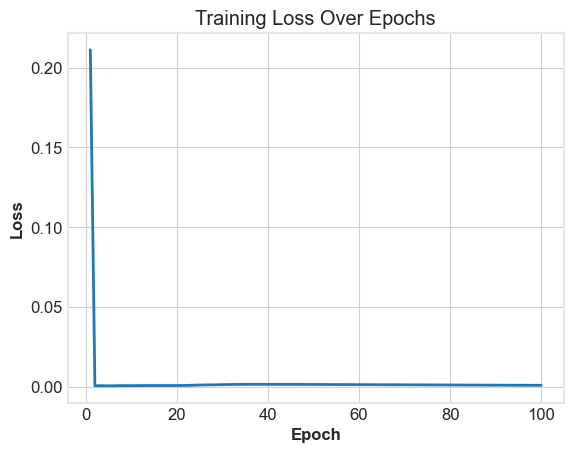

In [39]:
# Plot the loss 
plt.plot(range(1, num_epochs+1), train_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.show()

In [41]:

actual_values = []  # List to store actual values
predicted_values = []  # List to store predicted values

model.eval()
epoch_loss2= 0.0

with torch.no_grad():
    for x, y in train_dataloader:
        batchsize = x.shape[0]

        x = x.to('cpu')
        y = y.to('cpu')
        out = model(x)
        loss = criterion(out.contiguous(), y.contiguous())
        epoch_loss2 += (loss.detach().item() / batchsize)

        actual_values.extend(y.detach().numpy())
        predicted_values.extend(out.detach().numpy())

    

In [ ]:
print(predicted_values)

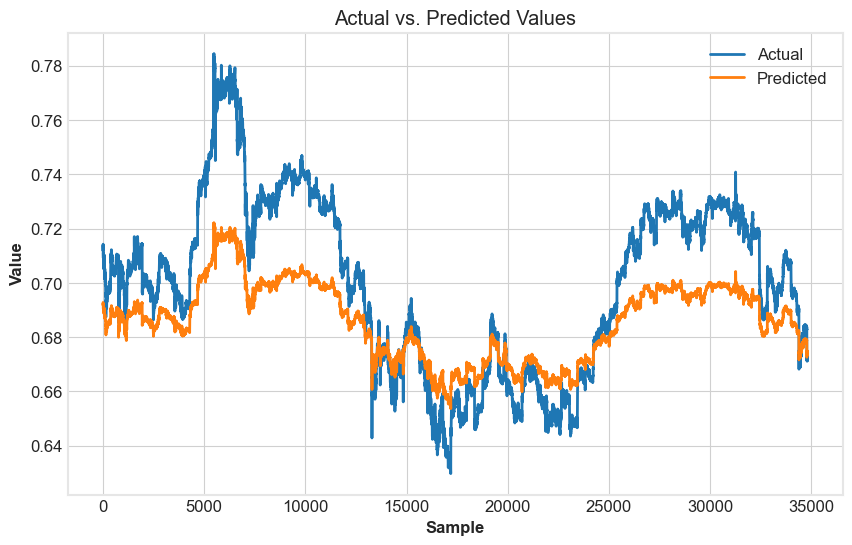

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual', linestyle='-')
plt.plot(predicted_values, label='Predicted', linestyle='-')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## Testing

In [54]:
test_loss=[] #to store test loss
test_actual_values = []  # List to store actual values
test_predicted_values = []  # List to store predicted values

model.eval()
epoch_loss2= 0.0

with torch.no_grad():
    for x, y in test_dataloader:
        batchsize = x.shape[0]

        x = x.to('cpu')
        y = y.to('cpu')
        out = model(x)
        loss = criterion(out.contiguous(), y.contiguous())
        epoch_loss2 += (loss.detach().item() / batchsize)

        test_actual_values.extend(y.detach().numpy())
        test_predicted_values.extend(out.detach().numpy())
        
for i in range(0,len(test_predicted_values)):
    test_loss.append(abs(test_actual_values[i]-test_predicted_values[i]))
    

In [63]:
print(len(test_actual_values))

11648


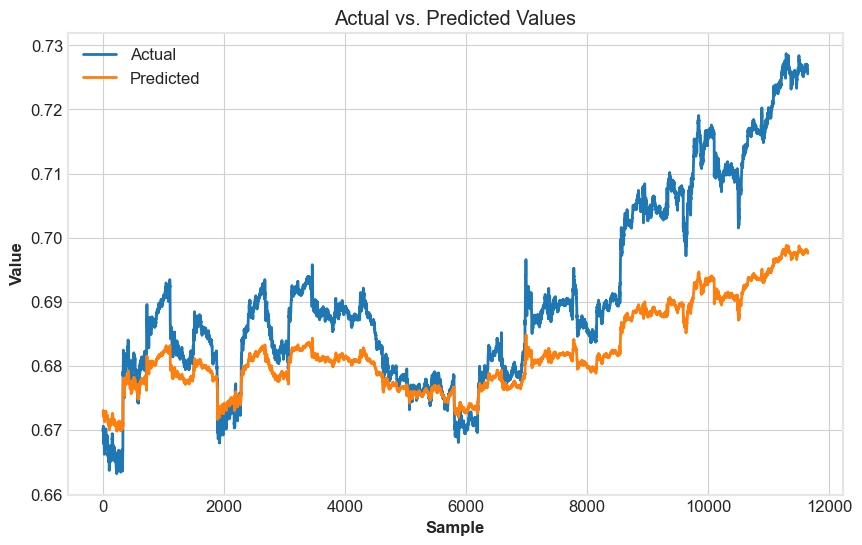

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(test_actual_values, label='Actual', linestyle='-')
plt.plot(test_predicted_values, label='Predicted', linestyle='-')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

## 7) -

(1683881,)


### Trading Module

In [83]:
print(filter_data)

                                   open      high       low     close  volume
Timestamp           ticker                                                   
2005-01-03 08:00:00 AAPL_1min    0.9939    0.9944    0.9939    0.9944   39200
2005-01-03 08:02:00 AAPL_1min    0.9863    0.9863    0.9863    0.9863  304360
2005-01-03 08:03:00 AAPL_1min    0.9955    0.9956    0.9955    0.9956   16800
2005-01-03 08:04:00 AAPL_1min    0.9962    0.9985    0.9962    0.9985  161504
2005-01-03 08:07:00 AAPL_1min    0.9971    0.9971    0.9970    0.9970   50400
...                                 ...       ...       ...       ...     ...
2022-02-25 19:54:00 AAPL_1min  164.3100  164.3100  164.3100  164.3100     350
2022-02-25 19:55:00 AAPL_1min  164.3200  164.3200  164.3200  164.3200     100
2022-02-25 19:57:00 AAPL_1min  164.3800  164.3800  164.3800  164.3800     422
2022-02-25 19:58:00 AAPL_1min  164.3400  164.3400  164.3300  164.3300     557
2022-02-25 19:59:00 AAPL_1min  164.3400  164.3500  164.3400  164

In [87]:
filter_data = combined_data.loc[pd.IndexSlice[:, target_ticker], columns_to_normalize]
scaler = MinMaxScaler()
normalized_data_1 = scaler.fit_transform(filter_data['close'].to_numpy().reshape(-1,1))

In [93]:
unscaled_predicted_test_data=scaler.inverse_transform(np.array(test_predicted_values).reshape(-1, 1)) #applying inverse to unnormalize the predicted data
print(unscaled_predicted_test_data)
unscaled_actual_test_data=scaler.inverse_transform(np.array(test_actual_values).reshape(-1, 1)) #applying inverse to unnormalize the predicted data
print(unscaled_actual_test_data)

[[123.546364]
 [123.50854 ]
 [123.53125 ]
 ...
 [128.04228 ]
 [128.04063 ]
 [128.02785 ]]
[[122.9589]
 [123.0535]
 [122.949 ]
 ...
 [133.1707]
 [133.1358]
 [133.1308]]


In [95]:
print(unscaled_predicted_test_data.shape)
print(unscaled_actual_test_data.shape)

(11648, 1)
(11648, 1)


In [120]:
class TradingPlatform:
    def __init__(self, initial_balance=100000, commission_rate=0.002, bid_ask_spread=0.01):
        self.balance = initial_balance
        self.portfolio = {}
        self.commission_rate = commission_rate
        self.trade_history = []

    def place_order(self, asset, action, quantity, price):
        if action == 'buy':
            total_cost = price * quantity
            commission = total_cost * self.commission_rate
            if total_cost + commission <= self.balance:
                # Incorporate bid-ask spread for buying
#                 total_cost += total_cost * self.bid_ask_spread
                self.balance -= (total_cost + commission)
                self.portfolio[asset] = self.portfolio.get(asset, 0) + quantity
                self.trade_history.append({'asset': asset, 'action': action, 'quantity': quantity, 'price': price, 'commission': commission})
                return price
        elif action == 'sell':
            if asset in self.portfolio and self.portfolio[asset] >= quantity:
                total_proceeds = price * quantity
                commission = total_proceeds * self.commission_rate
                # Incorporate bid-ask spread for selling
#                 total_proceeds -= total_proceeds * self.bid_ask_spread
                self.balance += (total_proceeds - commission)
                self.portfolio[asset] -= quantity
                self.trade_history.append({'asset': asset, 'action': action, 'quantity': quantity, 'price': price, 'commission': commission})
                return price
        return None

    def get_balance(self):
        return self.balance

    def get_portfolio(self):
        return self.portfolio

    def get_trade_history(self):
        return self.trade_history

Trading_module = TradingPlatform()

for i in range(len(test_actual_values)-1):
    if(unscaled_predicted_test_data[i+1]>unscaled_actual_test_data[i]):
        Trading_module.place_order('AAPL', 'buy', 10, unscaled_actual_test_data[i])
    else: Trading_module.place_order('AAPL', 'sell', 10, unscaled_actual_test_data[i])
    
print(Trading_module.get_balance())

[103303.71643066]


## 8)-

a) - The price prediction error increase as you go further from the last time it was trained 

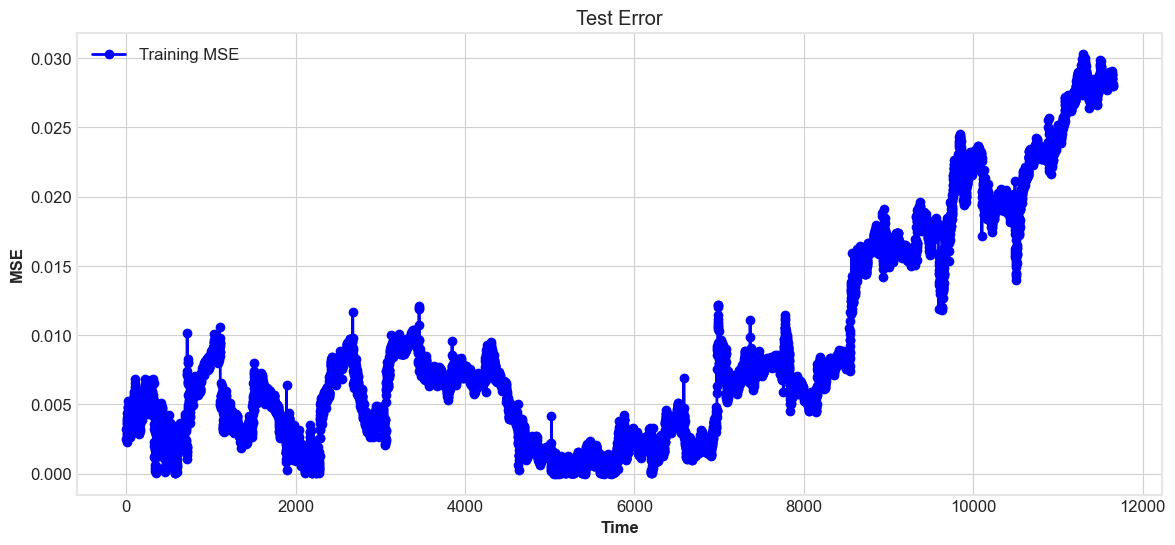

In [56]:
plt.figure(figsize=(14, 6))
plt.plot(range(1, len(test_loss) + 1),test_loss, marker='o', linestyle='-', color='b', label='Training MSE')
plt.xlabel('Time')
plt.ylabel('MSE')
plt.title('Test Error')
plt.legend()
plt.grid(True)
plt.show()

c) - as we can see from test graph , it is merely a chance that a simple buy and hold strategy works better . It also depends on the duration in which we are looking . For the duration I have chosen the buy and hold works better as i would have bought low and sell high. but there are other parts of the graphs where we might have bought high and sell low.

## References

https://stackoverflow.com/questions/75648914/trying-to-understand-lstm-parameter-hidden-size-in-pytorch - for hidden size


there is good article on how to select hidden layers in LSTM model :
https://ai.stackexchange.com/questions/3156/how-to-select-number-of-hidden-layers-and-number-of-memory-cells-in-an-lstm

Specifically for LSTMs, see this Reddit discussion Does the number of layers in an LSTM network affect its ability to remember long patterns? https://www.reddit.com/r/MachineLearning/comments/4behuh/does_the_number_of_layers_in_an_lstm_network/?rdt=50446

The main point is that there is usually no rule for the number of hidden nodes you should use, it is something you have to figure out for each case by trial and error.

If you are also interested in feedforward networks, see the question How to choose the number of hidden layers and nodes in a feedforward neural network? at Stats SE. Specifically, this answer was helpful https://stats.stackexchange.com/q/181/82135